</div><div style="text-align: center; font-size: 36px; margin-bottom: 10px;">
    Tesis de Maestría Data Science
</div>
<div style="text-align: center; font-size: 22px; margin-bottom: 5px;">
    Universidad de Montevideo
<div style="text-align: right; font-size: 18px; margin-bottom: 5px;">
    Ec. Cr. Hermes Javier López 
</div>
<div style="text-align: right; font-size: 14px;">
    Diciembre 2024
</div>

Tema: Estudio del Sistema Financiero Regulado de Uruguay - Descripción del mercado, comprensión de las ecuaciones fundamentales de las Instituciones del Sistema Financiero, detección de tendencias de mediano y largo plazo del Sistema Financiero Regulado. Análisis de las regularidades que pueden observarse, efecto de topes de Tasas de Interés, Fusiones y Adquisiciones, descubrimiento de efectos de la regulación. Planteo de hipótesis ante las propuestas planteadas en el plebiscito por topes de tasas.

Anásisis Sistema Financiero Regulado Uruguay 2013 - 2023  

INDICE

Parte 1 - Carga y procesamiento de Datos del Sistema

Parte 2.- Procesamiento, simplificación y análisis univariante

Parte 3.- Comprendiendo los clústers creados en awaSOM

Parte 4 - Pertenencia de Instituciones a los diversos clústers

Parte 5 - PCA Instituciones a lo largo de los años

Parte 6 - Evolución Créditos Vigentes por institución involucrada en la fusión

Parte 7 - Pruebas de crecimiento de cartera 

Parte 8 - Evolución del Resultado del Ejercicio por institución

Parte 9 - Correlación Pearson por Ratio

Parte 10 - Cuadro de indicadores por Institución

Parte 11.- Corrida de modelos para explicar el crecimiento de cartera  *** borrador ***

Parte 12.- Análisis de distribucion de cada Ratio

Parte 13.- Corrida de modelos para explicar el crecimiento de cartera

Parte 14.- Borrador

## Librerías a ser utilizadas

In [49]:
#1 Se cargan las librerias
import os
import pandas as pd
from openpyxl import load_workbook
import xlrd
import re
from datetime import datetime

import calendar
from unidecode import unidecode
from fuzzywuzzy import process
import chardet    

import pandas as pd
import numpy as np
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
import plotly.express as px

import altair as alt
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import plotly.graph_objects as go
import statsmodels.api as sm
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px


from matplotlib.patches import Rectangle

from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
!pip install graphviz


## Parte 1 - Carga y procesamiento de Datos del Sistema

In [4]:
import pandas as pd
import plotly.graph_objects as go

# Definir la ruta del archivo de entrada
input_path = "C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\indicadores_financieros_1.csv"

# Cargar los datos desde el archivo
try:
    df = pd.read_csv(input_path)

    # Especificar las columnas de indicadores financieros para análisis
    indicadores = [
        "ROA", "ROE", "Apalancamiento_Global", "Deterioros_Vencidos", "Cobertura_Morosidad",
        "Tasa_Morosidad", "Credito_Activo", "Deterioro_Credito", "Ratio_Eficiencia",
        "Intereses_C_Vigente", "Comisiones_C_Vigente", "Comisiones_perd_C_Vigente",
        "Incobrables_C_Vigente", "Gastos_C_Vigente", "GPersonal_C_Vigente",
        "Ctos_Ints_C_Vigente", "Resultados_C_Vigente", "Incob_C_Bruta", "Incob_C_Ints",
        "Ingr_C_Bruta"
    ]

    # Calcular las estadísticas deseadas para cada indicador
    results = df[indicadores].agg(['mean', 'std', 'min', 'max']).transpose().reset_index()
    results.columns = ['Indicadores', 'Mean', 'Std', 'Min', 'Max']

    # Crear un heatmap en Plotly para visualizar las estadísticas como una tabla
    fig = go.Figure(data=[go.Table(
        header=dict(values=['Indicadores', 'Mean', 'Std', 'Min', 'Max'], fill_color='paleturquoise'),
        cells=dict(values=[results.Indicadores, results.Mean.round(4), results.Std.round(4), results.Min, results.Max], fill_color='lavender'))
    ])

    fig.update_layout(title='Estadísticas de Indicadores Financieros')
    fig.show()
except Exception as e:
    print(f"Error: {e}")




In [5]:
import pandas as pd

# Ruta del archivo de entrada
input_path = "C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv"

# Cargar los datos de SOM
df_som = pd.read_csv(input_path)

# Especificar las columnas de indicadores financieros para análisis
indicadores = [
    "ROA", "ROE", "Apalancamiento_Global", "Deterioros_Vencidos", "Cobertura_Morosidad",
    "Tasa_Morosidad", "Credito_Activo", "Deterioro_Credito", "Ratio_Eficiencia",
    "Intereses_C_Vigente", "Comisiones_C_Vigente", "Comisiones_perd_C_Vigente",
    "Incobrables_C_Vigente", "Gastos_C_Vigente", "GPersonal_C_Vigente",
    "Ctos_Ints_C_Vigente", "Resultados_C_Vigente", "Incob_C_Bruta", "Incob_C_Ints",
    "Ingr_C_Bruta"
]

# Obtener las celdas únicas en SOM.cell
som_cells = sorted(df_som['SOM.cell'].unique())

# Crear un diccionario para almacenar los datos
data = {'Variable': indicadores}

# Calcular el promedio de cada indicador por celda y añadirlo al diccionario
for cell in som_cells:
    # Filtrar los datos para cada celda
    df_cell = df_som[df_som['SOM.cell'] == cell]
    # Calcular el promedio para cada indicador en esta celda
    data[f'Promedio Celda {cell}'] = df_cell[indicadores].mean().values

# Convertir el diccionario a un DataFrame para visualización
table_df = pd.DataFrame(data)

# Mostrar la tabla resultante
print("Promedios de Indicadores por Celda SOM:")
print(table_df)


Promedios de Indicadores por Celda SOM:
                     Variable  Promedio Celda 1  Promedio Celda 2  \
0                         ROA          0.031266          0.060646   
1                         ROE          0.111479          0.118244   
2       Apalancamiento_Global          2.559828          1.412108   
3         Deterioros_Vencidos          1.183440          1.072443   
4         Cobertura_Morosidad         46.381142         23.046276   
5              Tasa_Morosidad          0.070655          0.262222   
6              Credito_Activo          0.768588          0.791675   
7           Deterioro_Credito          0.074365          0.275170   
8            Ratio_Eficiencia          0.687604          0.930506   
9         Intereses_C_Vigente          0.171419          0.424504   
10       Comisiones_C_Vigente          0.126669          0.287087   
11  Comisiones_perd_C_Vigente          0.022331          0.025220   
12      Incobrables_C_Vigente          0.026708          0.2129

In [6]:
import pandas as pd

# Cargar los datos desde el archivo
input_path = "C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\indicadores_financieros_1.csv"
df = pd.read_csv(input_path)

# Especificar las columnas de indicadores financieros para análisis
indicadores = [
    "ROA", "ROE", "Apalancamiento_Global", "Deterioros_Vencidos", "Cobertura_Morosidad",
    "Tasa_Morosidad", "Credito_Activo", "Deterioro_Credito", "Ratio_Eficiencia",
    "Intereses_C_Vigente", "Comisiones_C_Vigente", "Comisiones_perd_C_Vigente",
    "Incobrables_C_Vigente", "Gastos_C_Vigente", "GPersonal_C_Vigente",
    "Ctos_Ints_C_Vigente", "Resultados_C_Vigente", "Incob_C_Bruta", "Incob_C_Ints",
    "Ingr_C_Bruta"
]

# Calcular las estadísticas deseadas para cada indicador
results = df[indicadores].agg(['mean', 'median', 'var', 'std', 'min', 'max']).transpose().reset_index()
results.columns = ['Indicadores', 'Mean', 'Median', 'Var', 'Std', 'Min', 'Max']

# Redondear los valores a dos decimales
results = results.round(2)

# Ajustar el índice para que comience desde 1
results.index = results.index + 1

# Mostrar el cuadro de datos en consola
print(results)

# (Opcional) Si usas Jupyter Notebook, puedes mostrarlo con estilo
try:
    from IPython.display import display
    display(results)
except ImportError:
    pass


                  Indicadores   Mean  Median      Var    Std   Min     Max
1                         ROA   0.04    0.02     0.00   0.06 -0.25    0.26
2                         ROE   0.15    0.11     0.08   0.28 -0.85    1.85
3       Apalancamiento_Global   5.55    3.56    24.64   4.96  0.03   18.77
4         Deterioros_Vencidos   4.21    1.11   941.09  30.68  0.00  525.02
5         Cobertura_Morosidad  40.30   28.08  1036.98  32.20  0.52  100.00
6              Tasa_Morosidad   0.11    0.05     0.01   0.12  0.00    0.50
7              Credito_Activo   0.63    0.69     0.06   0.24 -0.00    0.97
8           Deterioro_Credito   0.12    0.07     0.01   0.11  0.00    0.48
9            Ratio_Eficiencia   0.86    0.75     0.68   0.83 -3.07   12.05
10        Intereses_C_Vigente   0.25    0.18     0.04   0.19  0.01    1.00
11       Comisiones_C_Vigente   0.18    0.07     0.08   0.28  0.00    2.10
12  Comisiones_perd_C_Vigente   0.03    0.01     0.00   0.07  0.00    0.44
13      Incobrables_C_Vig

,Indicadores,Mean,Median,Var,Std,Min,Max
1,ROA,0.04,0.02,0.00,0.06,-0.25,0.26
2,ROE,0.15,0.11,0.08,0.28,-0.85,1.85
3,Apalancamiento_Global,5.55,3.56,24.64,4.96,0.03,18.77
4,Deterioros_Vencidos,4.21,1.11,941.09,30.68,0.00,525.02
5,Cobertura_Morosidad,40.30,28.08,1036.98,32.20,0.52,100.00
6,Tasa_Morosidad,0.11,0.05,0.01,0.12,0.00,0.50
7,Credito_Activo,0.63,0.69,0.06,0.24,-0.00,0.97
8,Deterioro_Credito,0.12,0.07,0.01,0.11,0.00,0.48
9,Ratio_Eficiencia,0.86,0.75,0.68,0.83,-3.07,12.05
10,Intereses_C_Vigente,0.25,0.18,0.04,0.19,0.01,1.00


## Anexo 1 Análisis Univariante 

In [7]:
# Definir la ruta del archivo CSV
folder_path = r'C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\'
file_path = f"{folder_path}\\indicadores_financieros_0.csv"  
df = pd.read_csv(file_path)

# Definir la variable de interés
variable_de_interes = 'ROA'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.6
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()


C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\2518704244.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
# Definir la ruta del archivo CSV
folder_path = r'C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\'
file_path = f"{folder_path}\\indicadores_financieros_0.csv"  
df = pd.read_csv(file_path)

# Definir la variable de interés
variable_de_interes = 'ROE'  #  Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\2768440010.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:


# Definir la variable de interés
variable_de_interes = 'Apalancamiento_Global'  # Cambia para cada  variable

# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1193216249.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
# Definir la ruta del archivo CSV
folder_path = r'C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\'
file_path = f"{folder_path}\\indicadores_financieros_0.csv"  
df = pd.read_csv(file_path)

# Definir la variable de interés
variable_de_interes = 'Deterioros_Vencidos'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 0.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\3150929563.py:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:


# Definir la variable de interés
variable_de_interes = 'Cobertura_Morosidad'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\4016317370.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:


# Definir la variable de interés
variable_de_interes = 'Tasa_Morosidad'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.01
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1892530000.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:

# Definir la variable de interés
variable_de_interes = 'Credito_Activo'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\428381202.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:


# Definir la variable de interés
variable_de_interes = 'Deterioro_Credito'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\309834769.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:

# Definir la variable de interés
variable_de_interes = 'Ratio_Eficiencia'  ## Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.05
max_x_value = df_bancos[variable_de_interes].max() *0.4
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\3439799046.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:

# Definir la variable de interés
variable_de_interes = 'Intereses_C_Vigente'  # # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1022685620.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:

# Definir la variable de interés
variable_de_interes = 'Comisiones_C_Vigente'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 0.7
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\3176055420.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:


# Definir la variable de interés
variable_de_interes = 'Comisiones_perd_C_Vigente'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1.1
max_x_value = df_bancos[variable_de_interes].max() * 1.05
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\3999726448.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:


# Definir la variable de interés
variable_de_interes = 'Incobrables_C_Vigente'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1
max_x_value = df_bancos[variable_de_interes].max() * 0.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\3607826010.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:

# Definir la variable de interés
variable_de_interes = 'Gastos_C_Vigente'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1
max_x_value = df_bancos[variable_de_interes].max() * 0.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1687997615.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:


# Definir la variable de interés
variable_de_interes = 'GPersonal_C_Vigente' # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1
max_x_value = df_bancos[variable_de_interes].max() * 0.3
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1574134794.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:

# Definir la variable de interés
variable_de_interes = 'Ctos_Ints_C_Vigente'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\2858591201.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:

# Definir la variable de interés
variable_de_interes = 'Resultados_C_Vigente'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.01
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1698631399.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:

# Definir la variable de interés
variable_de_interes = 'Incob_C_Bruta'  # Cambia para cada  variable

# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1
max_x_value = df_bancos[variable_de_interes].max() * 0.35
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\1486243201.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:

# Definir la variable de interés
variable_de_interes = 'Incob_C_Ints'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 1.1
max_x_value = df_bancos[variable_de_interes].max() * 0.4
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\2292032612.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:

# Definir la variable de interés
variable_de_interes = 'Ingr_C_Bruta' # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\3629757133.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:

# Definir la variable de interés
variable_de_interes = 'ROE'  # Cambia para cada  variable


# Filtrar los datos para los tipos especificados y los años 2013, 2018, y 2023
df_bancos = df[(df['Tipo'].isin(['Administradora', 'Banco', 'Casa Financiera', 'Circulos', 'Cooperativa', 'IFE'])) & 
               (df['año'].isin([2013, 2018, 2023]))]

# Definir el orden inverso de los tipos de instituciones
tipo_ordenado = ['IFE', 'Cooperativa', 'Circulos', 'Casa Financiera', 'Banco', 'Administradora']

# Identificar las instituciones sin datos en 2023 dentro de cada tipo
instituciones_sin_2023 = df_bancos[~df_bancos['Short_name'].isin(df_bancos[df_bancos['año'] == 2023]['Short_name'])]
instituciones_con_2023 = df_bancos[df_bancos['año'] == 2023]

# Ordenar cada grupo de instituciones
ordered_institutions = []
for tipo in tipo_ordenado:
    # Ordenar instituciones dentro del tipo que no tienen datos en 2023
    institutions_in_tipo_sin_2023 = instituciones_sin_2023[instituciones_sin_2023['Tipo'] == tipo]
    institutions_in_tipo_sin_2023 = institutions_in_tipo_sin_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Ordenar instituciones dentro del tipo que tienen datos en 2023
    institutions_in_tipo_con_2023 = instituciones_con_2023[instituciones_con_2023['Tipo'] == tipo]
    institutions_in_tipo_con_2023 = institutions_in_tipo_con_2023.sort_values(by=variable_de_interes, ascending=False)['Short_name'].unique().tolist()
    
    # Combinar y agregar al orden final
    ordered_institutions.extend(institutions_in_tipo_sin_2023 + institutions_in_tipo_con_2023)

# Aplicar el orden de instituciones a todo el conjunto de datos `df_bancos`
df_bancos['Short_name'] = pd.Categorical(df_bancos['Short_name'], categories=ordered_institutions, ordered=True)

# Crear la figura
fig = go.Figure()

# Añadir los datos para cada año con diferentes formas de marcadores y colores
years_markers = {
    2013: {'marker': 'circle', 'color': 'rgb(55,126,184)'},          # Redondo y color azul 
    2018: {'marker': 'square', 'color': 'rgb(228, 26, 28)'},         # Cuadrado y color rojo 
    2023: {'marker': 'star', 'color': 'rgb(77, 175, 74)'}            # Estrella y color verde 
}

# Iterar sobre los años y añadir los trazos (lines)
for year, properties in years_markers.items():
    year_data = df_bancos[df_bancos['año'] == year]
    
    fig.add_trace(go.Scatter(
        y=year_data['Short_name'],  # Cambiar eje a Y con 'Short_name'
        x=year_data[variable_de_interes],  # Eje X con la variable de interés
        mode='markers',  # Mostrar solo los marcadores
        name=f'Año {year}',  # Etiqueta para la leyenda
        marker=dict(symbol=properties['marker'], size=10, color=properties['color']),  # Asignar forma y color del marcador
        text=year_data[variable_de_interes].apply(lambda x: f'{x:.1f}'),  # Mostrar los valores en hover
    ))

# Crear líneas divisorias punteadas al final de cada tipo de institución
shapes = []
for i in range(len(tipo_ordenado) - 1):
    tipo_actual = tipo_ordenado[i]
    tipo_siguiente = tipo_ordenado[i + 1]
    
    # Obtener las instituciones en el tipo actual y en el tipo siguiente
    instituciones_tipo_actual = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_actual]
    instituciones_tipo_siguiente = [inst for inst in ordered_institutions if df_bancos[df_bancos['Short_name'] == inst]['Tipo'].iloc[0] == tipo_siguiente]
    
    # Verificar si ambos tipos tienen instituciones para calcular el punto medio
    if instituciones_tipo_actual and instituciones_tipo_siguiente:
        ultima_institucion_tipo_actual = instituciones_tipo_actual[-1]
        primera_institucion_tipo_siguiente = instituciones_tipo_siguiente[0]
        
        # Calcular el índice medio y obtener la institución correspondiente
        midpoint_index = (ordered_institutions.index(ultima_institucion_tipo_actual) + 
                          ordered_institutions.index(primera_institucion_tipo_siguiente)) / 2
        midpoint_position = ordered_institutions[int(midpoint_index)]
        
        # Añadir la línea divisoria en el punto medio entre los tipos
        shapes.append(dict(
            type='line',
            yref='y', y0=midpoint_position, y1=midpoint_position,
            xref='paper', x0=0, x1=1,
            line=dict(color='black', width=2, dash='dot')
        ))

# Ajustar el rango del eje X para asegurar que los valores sean razonables
min_x_value = df_bancos[variable_de_interes].min() * 0.4
max_x_value = df_bancos[variable_de_interes].max() * 1.1
fig.update_xaxes(range=[min_x_value, max_x_value])

# Ajustar el layout del gráfico para mayor visibilidad y orden en el eje Y
fig.update_layout(
    title={
        'text': f'{variable_de_interes} - Diferentes Tipos de Instituciones<br><sup>Datos ordenados según observación del año 2023</sup>',
        'x': 0.5,  # Centrar el título
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title=f'{variable_de_interes} ',
    yaxis_title='Instituciones (Ordenadas por Tipo y Valor de 2023)',
    yaxis=dict(type='category', tickmode='linear', categoryorder='array', categoryarray=ordered_institutions),  # Ordenar según 'Short_name'
    legend_title='Año',
    height=1000,  # Ajustar la altura del gráfico para que entren todas las instituciones
    width=1000,  # Ajustar el ancho del gráfico para mayor legibilidad
    margin=dict(l=50, r=50, t=80, b=150),  # Ajustar márgenes
    showlegend=True,  # Mostrar la leyenda con los diferentes años
    shapes=shapes  # Añadir las líneas divisorias punteadas
)

# Mostrar el gráfico
fig.show()

C:\Users\Javier\AppData\Local\Temp\ipykernel_13644\4101481207.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##  Análisis SOM

In [33]:
# Definir la ruta del archivo CSV
folder_path = r'C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data'
file_path = f"{folder_path}\\aweSOM_06_805408.csv"  # Ruta para captar el resultado del SOM
df = pd.read_csv(file_path)

# Filtrar los datos para los tipos 'Circulos', 'IFE', 'Cooperativa', 'Casa Financiera', 'Banco', y 'Administradora'
bancos_data = df[df['Tipo'].isin(['Circulos', 'IFE', 'Cooperativa', 'Casa Financiera', 'Banco', 'Administradora'])]

# Inicializar DataFrame para almacenar los porcentajes
all_percentages = pd.DataFrame()

# Calcular porcentajes de aparición por celda para cada Tipo de institución
for tipo in bancos_data['Tipo'].unique():
    tipo_data = bancos_data[bancos_data['Tipo'] == tipo]

    # Contar el número de apariciones en cada celda del SOM
    cell_counts = tipo_data.groupby(['SOM.cell']).size().reset_index(name='counts')

    # Calcular el porcentaje de veces que aparece en cada celda
    total_count = cell_counts['counts'].sum()
    cell_counts['percentage'] = (cell_counts['counts'] / total_count) * 100

    # Agregar el Tipo al DataFrame
    cell_counts['Tipo'] = tipo

    # Añadir al DataFrame completo
    all_percentages = pd.concat([all_percentages, cell_counts], ignore_index=True)

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear gráfico de barras apiladas con Plotly
fig = go.Figure()

# Añadir barras apiladas para cada celda del SOM con colores fijos
for cell in sorted(all_percentages['SOM.cell'].unique()):
    cell_data = all_percentages[all_percentages['SOM.cell'] == cell]
    fig.add_trace(go.Bar(
        x=cell_data['Tipo'],  # Usar Tipo para el eje X
        y=cell_data['percentage'],
        name=f'Celda {cell}',  # Etiquetar con el número de celda
        text=cell_data['percentage'].apply(lambda x: f'{x:.1f}%'),  # Mostrar los porcentajes en las barras
        textposition='inside',  # Colocar el texto dentro de las barras para mayor claridad
        hoverinfo='x+y+text',   # Mostrar info al pasar el cursor
        marker=dict(color=cell_colors[cell], line=dict(width=0.5, color='grey'))  # Asignar color fijo a cada celda
    ))

# Ajustar el layout del gráfico
fig.update_layout(
    title='Porcentaje de Apariciones por Celda del SOM por Tipo de Institución',
    xaxis_title='Tipo de Institución',
    yaxis_title='Porcentaje de Apariciones (%)',
    barmode='stack',  # Apilar las barras por celda
    xaxis=dict(type='category', tickmode='linear'),  # Asegurar que todos los tipos se muestran
    legend_title='Celda del SOM'
)

# Mostrar el gráfico
fig.show()


In [34]:

# Filtrar los datos para el tipo 'Banco'
bancos_data = df[df['Tipo'] == 'Banco']

# Inicializar DataFrame para almacenar los porcentajes
all_percentages = pd.DataFrame()

# Calcular porcentajes de aparición por celda para cada Short_name de tipo Banco
for short_name in bancos_data['Short_name'].unique():
    short_name_data = bancos_data[bancos_data['Short_name'] == short_name]

    # Contar el número de apariciones en cada celda del SOM
    cell_counts = short_name_data.groupby(['SOM.cell']).size().reset_index(name='counts')

    # Calcular el porcentaje de veces que aparece en cada celda
    total_count = cell_counts['counts'].sum()
    cell_counts['percentage'] = (cell_counts['counts'] / total_count) * 100

    # Agregar el Short_name al DataFrame
    cell_counts['Short_name'] = short_name

    # Añadir al DataFrame completo
    all_percentages = pd.concat([all_percentages, cell_counts], ignore_index=True)


# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Verde claro
    6: '#fed9a6'   # Anaranjado
}

# Crear gráfico de barras apiladas con Plotly
fig = go.Figure()

# Añadir barras apiladas para cada celda del SOM con colores fijos
for cell in sorted(all_percentages['SOM.cell'].unique()):
    cell_data = all_percentages[all_percentages['SOM.cell'] == cell]
    fig.add_trace(go.Bar(
        x=cell_data['Short_name'],  # Usar Short_name para el eje X
        y=cell_data['percentage'],
        name=f'Celda {cell}',  # Etiquetar con el número de celda
        text=cell_data['percentage'].apply(lambda x: f'{x:.1f}%'),  # Mostrar los porcentajes en las barras
        textposition='inside',  # Colocar el texto dentro de las barras para mayor claridad
        hoverinfo='x+y+text',   # Mostrar info al pasar el cursor
        marker=dict(color=cell_colors[cell], line=dict(width=0.5, color='grey'))  # Asignar color fijo a cada celda
    ))

# Ajustar el layout del gráfico
fig.update_layout(
    title='Porcentaje de Apariciones por Celda del SOM - Bancos',
    xaxis_title='Institución',
    yaxis_title='Porcentaje de Apariciones (%)',
    barmode='stack',  # Apilar las barras por celda
    xaxis=dict(type='category', tickmode='linear'),  # Asegurar que todos los bancos se muestran
    legend_title='Celda del SOM'
)

# Mostrar el gráfico
fig.show()


In [35]:


# Filtrar los datos para el tipo 'Banco'
bancos_data = df[df['Tipo'] == 'Administradora']

# Inicializar DataFrame para almacenar los porcentajes
all_percentages = pd.DataFrame()

# Calcular porcentajes de aparición por celda para cada Short_name de tipo Banco
for short_name in bancos_data['Short_name'].unique():
    short_name_data = bancos_data[bancos_data['Short_name'] == short_name]

    # Contar el número de apariciones en cada celda del SOM
    cell_counts = short_name_data.groupby(['SOM.cell']).size().reset_index(name='counts')

    # Calcular el porcentaje de veces que aparece en cada celda
    total_count = cell_counts['counts'].sum()
    cell_counts['percentage'] = (cell_counts['counts'] / total_count) * 100

    # Agregar el Short_name al DataFrame
    cell_counts['Short_name'] = short_name

    # Añadir al DataFrame completo
    all_percentages = pd.concat([all_percentages, cell_counts], ignore_index=True)

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Verde claro
    6: '#fed9a6'   # Anaranjado
}
# Crear gráfico de barras apiladas con Plotly
fig = go.Figure()

# Añadir barras apiladas para cada celda del SOM con colores fijos
for cell in sorted(all_percentages['SOM.cell'].unique()):
    cell_data = all_percentages[all_percentages['SOM.cell'] == cell]
    fig.add_trace(go.Bar(
        x=cell_data['Short_name'],  # Usar Short_name para el eje X
        y=cell_data['percentage'],
        name=f'Celda {cell}',  # Etiquetar con el número de celda
        text=cell_data['percentage'].apply(lambda x: f'{x:.1f}%'),  # Mostrar los porcentajes en las barras
        textposition='inside',  # Colocar el texto dentro de las barras para mayor claridad
        hoverinfo='x+y+text',   # Mostrar info al pasar el cursor
        marker=dict(color=cell_colors[cell], line=dict(width=0.5, color='grey'))  # Asignar color fijo a cada celda
    ))

# Ajustar el layout del gráfico
fig.update_layout(
    title='Porcentaje de Apariciones por Celda del SOM - Administradoras',
    xaxis_title='Institución',
    yaxis_title='Porcentaje de Apariciones (%)',
    barmode='stack',  # Apilar las barras por celda
    xaxis=dict(type='category', tickmode='linear'),  # Asegurar que todos los bancos se muestran
    legend_title='Celda del SOM'
)

# Mostrar el gráfico
fig.show()


In [37]:


# Filtrar los datos para los tipos 'Circulos', 'IFE', 'Cooperativa', y 'Casa Financiera'
bancos_data = df[df['Tipo'].isin(['Circulos', 'IFE', 'Cooperativa', 'Casa Financiera'])]

# Inicializar DataFrame para almacenar los porcentajes
all_percentages = pd.DataFrame()

# Calcular porcentajes de aparición por celda para cada Short_name de tipo Banco
for short_name in bancos_data['Short_name'].unique():
    short_name_data = bancos_data[bancos_data['Short_name'] == short_name]

    # Contar el número de apariciones en cada celda del SOM
    cell_counts = short_name_data.groupby(['SOM.cell']).size().reset_index(name='counts')

    # Calcular el porcentaje de veces que aparece en cada celda
    total_count = cell_counts['counts'].sum()
    cell_counts['percentage'] = (cell_counts['counts'] / total_count) * 100

    # Agregar el Short_name al DataFrame
    cell_counts['Short_name'] = short_name

    # Añadir al DataFrame completo
    all_percentages = pd.concat([all_percentages, cell_counts], ignore_index=True)

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Verde claro
    6: '#fed9a6'   # Anaranjado
}

# Crear gráfico de barras apiladas con Plotly
fig = go.Figure()

# Añadir barras apiladas para cada celda del SOM con colores fijos
for cell in sorted(all_percentages['SOM.cell'].unique()):
    cell_data = all_percentages[all_percentages['SOM.cell'] == cell]
    fig.add_trace(go.Bar(
        x=cell_data['Short_name'],  # Usar Short_name para el eje X
        y=cell_data['percentage'],
        name=f'Celda {cell}',  # Etiquetar con el número de celda
        text=cell_data['percentage'].apply(lambda x: f'{x:.1f}%'),  # Mostrar los porcentajes en las barras
        textposition='inside',  # Colocar el texto dentro de las barras para mayor claridad
        hoverinfo='x+y+text',   # Mostrar info al pasar el cursor
        marker=dict(color=cell_colors[cell], line=dict(width=0.5, color='grey'))  # Asignar color fijo a cada celda
    ))

# Ajustar el layout del gráfico
fig.update_layout(
    title='Porcentaje de Apariciones por Celda del SOM - Circulos, Cooperativas, Casas Financieras',
    xaxis_title='Institución',
    yaxis_title='Porcentaje de Apariciones (%)',
    barmode='stack',  # Apilar las barras por celda
    xaxis=dict(type='category', tickmode='linear'),  # Asegurar que todos los bancos se muestran
    legend_title='Celda del SOM'
)

# Mostrar el gráfico
fig.show()

## Celda por celda

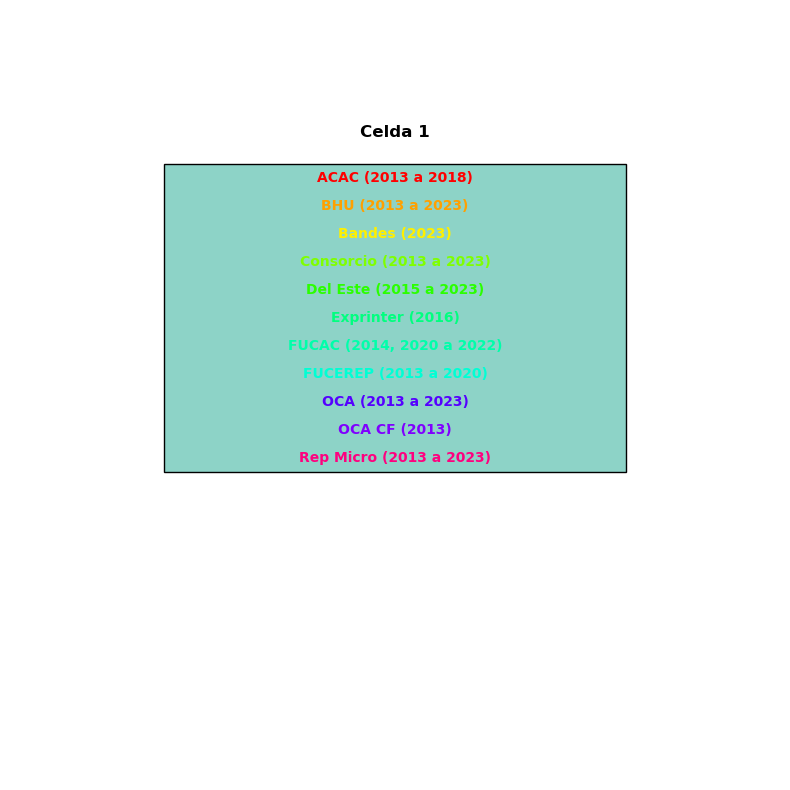

In [47]:
# Cargar los datos
modelo = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\aweSOM_06_805408.csv')
short_name_colors = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\short_name_colors.csv').set_index('Short_name')

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#8DD3C7',  # Verde
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Función para agrupar años consecutivos
def format_years(years):
    years = sorted(set(years))
    ranges = []
    start = years[0]

    for i in range(1, len(years)):
        if years[i] != years[i - 1] + 1:
            end = years[i - 1]
            ranges.append(f"{start} a {end}" if start != end else str(start))
            start = years[i]
    ranges.append(f"{start} a {years[-1]}" if start != years[-1] else str(start))

    return ', '.join(ranges)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de visualización ajustado
ax.set_aspect('equal')
plt.axis('off')

# Función para dibujar solo el rectángulo de la celda 1
def draw_rectangle(cell_number, position_x, position_y):
    celda_especifica = modelo[modelo['SOM.cell'] == cell_number]
    grouped = celda_especifica.groupby('Short_name')['año'].apply(lambda x: format_years(x)).reset_index()
    grouped = grouped.sort_values('Short_name')  # Ordenar alfabéticamente
    
    if not grouped.empty:
        correct_color = cell_colors.get(cell_number, 'white')  # Color específico para la celda
        
        # Dibujo del rectángulo
        rect = Rectangle((position_x, position_y), 0.6, 0.4, facecolor=correct_color, edgecolor='k', transform=ax.transAxes)
        ax.add_patch(rect)

        # Título del rectángulo (número de la celda)
        ax.text(position_x + 0.3, position_y + 0.4 + 0.05, f"Celda {cell_number}", ha='center', va='top', color='black', fontsize=12, fontweight='bold', transform=ax.transAxes)

        # Distribución de textos con color específico
        num_entries = len(grouped)
        vertical_space = 0.4 / num_entries
        vertical_start = position_y + 0.4 - (vertical_space / 2)

        for index, row in enumerate(grouped.itertuples()):
            short_name = row.Short_name
            years = row.año
            text_color = short_name_colors.loc[short_name, 'Color'] if short_name in short_name_colors.index else 'black'

            # Posicionar texto
            y_pos = vertical_start - (vertical_space * index)
            ax.text(position_x + 0.3, y_pos, f"{short_name} ({years})", ha='center', va='center', color=text_color, fontsize=10, fontweight='bold', transform=ax.transAxes)

# Dibujar solo la celda 1 como un rectángulo
draw_rectangle(1, 0.2, 0.4)

plt.show()


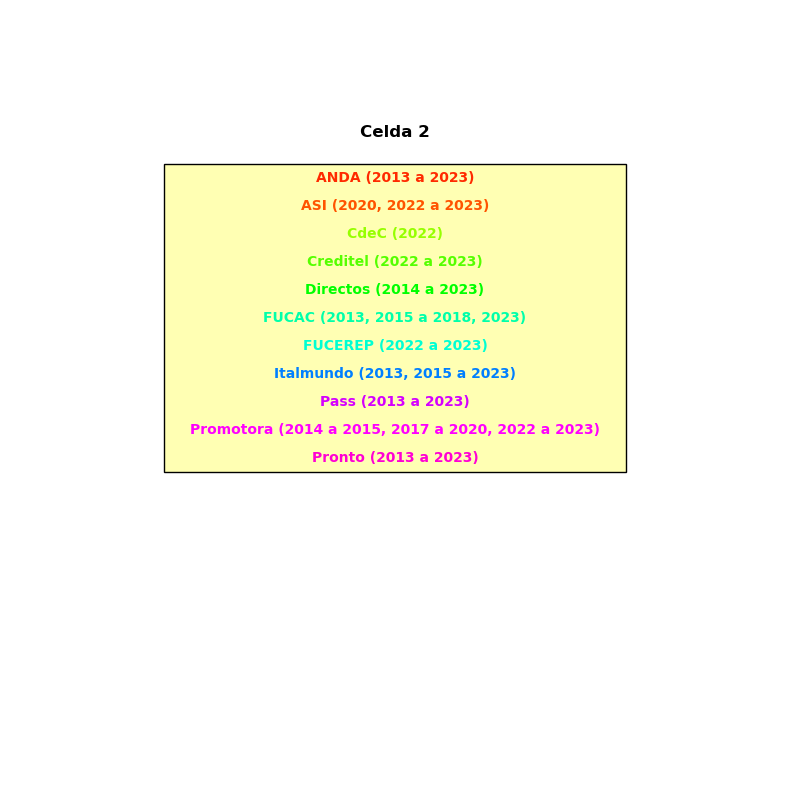

In [40]:


# Cargar los datos
modelo = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\aweSOM_06_805408.csv')
short_name_colors = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\short_name_colors.csv').set_index('Short_name')

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Verde claro
    6: '#fed9a6'   # Anaranjado
}

# Función para agrupar años consecutivos
def format_years(years):
    years = sorted(set(years))
    ranges = []
    start = years[0]

    for i in range(1, len(years)):
        if years[i] != years[i - 1] + 1:
            end = years[i - 1]
            ranges.append(f"{start} a {end}" if start != end else str(start))
            start = years[i]
    ranges.append(f"{start} a {years[-1]}" if start != years[-1] else str(start))

    return ', '.join(ranges)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de visualización ajustado
ax.set_aspect('equal')
plt.axis('off')

# Función para dibujar solo el rectángulo de la celda 1
def draw_rectangle(cell_number, position_x, position_y):
    celda_especifica = modelo[modelo['SOM.cell'] == cell_number]
    grouped = celda_especifica.groupby('Short_name')['año'].apply(lambda x: format_years(x)).reset_index()
    grouped = grouped.sort_values('Short_name')  # Ordenar alfabéticamente
    
    if not grouped.empty:
        correct_color = cell_colors.get(cell_number, 'white')  # Color específico para la celda
        
        # Dibujo del rectángulo
        rect = Rectangle((position_x, position_y), 0.6, 0.4, facecolor=correct_color, edgecolor='k', transform=ax.transAxes)
        ax.add_patch(rect)

        # Título del rectángulo (número de la celda)
        ax.text(position_x + 0.3, position_y + 0.4 + 0.05, f"Celda {cell_number}", ha='center', va='top', color='black', fontsize=12, fontweight='bold', transform=ax.transAxes)

        # Distribución de textos con color específico
        num_entries = len(grouped)
        vertical_space = 0.4 / num_entries
        vertical_start = position_y + 0.4 - (vertical_space / 2)

        for index, row in enumerate(grouped.itertuples()):
            short_name = row.Short_name
            years = row.año
            text_color = short_name_colors.loc[short_name, 'Color'] if short_name in short_name_colors.index else 'black'

            # Posicionar texto
            y_pos = vertical_start - (vertical_space * index)
            ax.text(position_x + 0.3, y_pos, f"{short_name} ({years})", ha='center', va='center', color=text_color, fontsize=10, fontweight='bold', transform=ax.transAxes)

# Dibujar solo la celda 1 como un rectángulo
draw_rectangle(2, 0.2, 0.4)

plt.show()

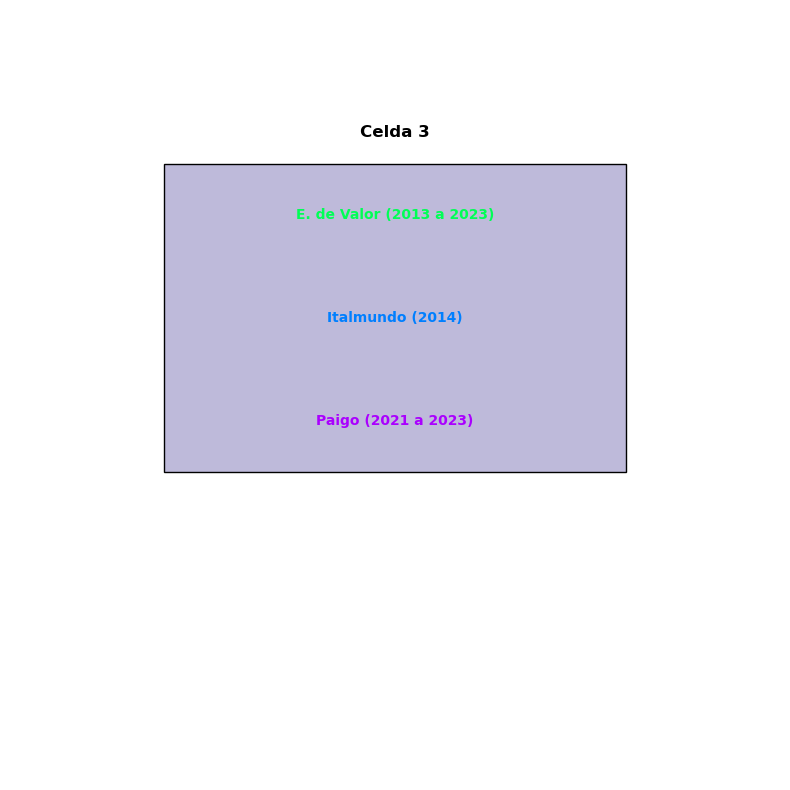

In [44]:
# Cargar los datos
modelo = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\aweSOM_06_805408.csv')
short_name_colors = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\short_name_colors.csv').set_index('Short_name')

# Definir colores específicos para cada celda SOM
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Función para agrupar años consecutivos
def format_years(years):
    years = sorted(set(years))
    ranges = []
    start = years[0]

    for i in range(1, len(years)):
        if years[i] != years[i - 1] + 1:
            end = years[i - 1]
            ranges.append(f"{start} a {end}" if start != end else str(start))
            start = years[i]
    ranges.append(f"{start} a {years[-1]}" if start != years[-1] else str(start))

    return ', '.join(ranges)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de visualización ajustado
ax.set_aspect('equal')
plt.axis('off')

# Función para dibujar solo el rectángulo de la celda 1
def draw_rectangle(cell_number, position_x, position_y):
    celda_especifica = modelo[modelo['SOM.cell'] == cell_number]
    grouped = celda_especifica.groupby('Short_name')['año'].apply(lambda x: format_years(x)).reset_index()
    grouped = grouped.sort_values('Short_name')  # Ordenar alfabéticamente
    
    if not grouped.empty:
        correct_color = cell_colors.get(cell_number, 'white')  # Color específico para la celda
        
        # Dibujo del rectángulo
        rect = Rectangle((position_x, position_y), 0.6, 0.4, facecolor=correct_color, edgecolor='k', transform=ax.transAxes)
        ax.add_patch(rect)

        # Título del rectángulo (número de la celda)
        ax.text(position_x + 0.3, position_y + 0.4 + 0.05, f"Celda {cell_number}", ha='center', va='top', color='black', fontsize=12, fontweight='bold', transform=ax.transAxes)

        # Distribución de textos con color específico
        num_entries = len(grouped)
        vertical_space = 0.4 / num_entries
        vertical_start = position_y + 0.4 - (vertical_space / 2)

        for index, row in enumerate(grouped.itertuples()):
            short_name = row.Short_name
            years = row.año
            text_color = short_name_colors.loc[short_name, 'Color'] if short_name in short_name_colors.index else 'black'

            # Posicionar texto
            y_pos = vertical_start - (vertical_space * index)
            ax.text(position_x + 0.3, y_pos, f"{short_name} ({years})", ha='center', va='center', color=text_color, fontsize=10, fontweight='bold', transform=ax.transAxes)

# Dibujar solo la celda 1 como un rectángulo
draw_rectangle(3, 0.2, 0.4)

plt.show()

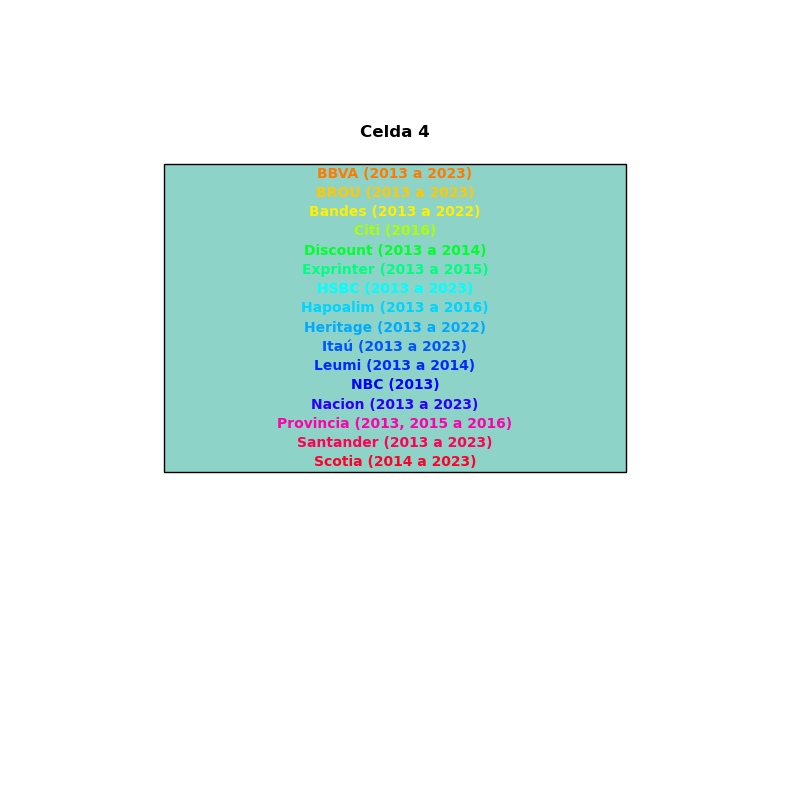

In [42]:
# Cargar los datos
modelo = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\aweSOM_06_805408.csv')
short_name_colors = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\short_name_colors.csv').set_index('Short_name')

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}
# Función para agrupar años consecutivos
def format_years(years):
    years = sorted(set(years))
    ranges = []
    start = years[0]

    for i in range(1, len(years)):
        if years[i] != years[i - 1] + 1:
            end = years[i - 1]
            ranges.append(f"{start} a {end}" if start != end else str(start))
            start = years[i]
    ranges.append(f"{start} a {years[-1]}" if start != years[-1] else str(start))

    return ', '.join(ranges)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de visualización ajustado
ax.set_aspect('equal')
plt.axis('off')

# Función para dibujar solo el rectángulo de la celda 1
def draw_rectangle(cell_number, position_x, position_y):
    celda_especifica = modelo[modelo['SOM.cell'] == cell_number]
    grouped = celda_especifica.groupby('Short_name')['año'].apply(lambda x: format_years(x)).reset_index()
    grouped = grouped.sort_values('Short_name')  # Ordenar alfabéticamente
    
    if not grouped.empty:
        correct_color = cell_colors.get(cell_number, 'white')  # Color específico para la celda
        
        # Dibujo del rectángulo
        rect = Rectangle((position_x, position_y), 0.6, 0.4, facecolor=correct_color, edgecolor='k', transform=ax.transAxes)
        ax.add_patch(rect)

        # Título del rectángulo (número de la celda)
        ax.text(position_x + 0.3, position_y + 0.4 + 0.05, f"Celda {cell_number}", ha='center', va='top', color='black', fontsize=12, fontweight='bold', transform=ax.transAxes)

        # Distribución de textos con color específico
        num_entries = len(grouped)
        vertical_space = 0.4 / num_entries
        vertical_start = position_y + 0.4 - (vertical_space / 2)

        for index, row in enumerate(grouped.itertuples()):
            short_name = row.Short_name
            years = row.año
            text_color = short_name_colors.loc[short_name, 'Color'] if short_name in short_name_colors.index else 'black'

            # Posicionar texto
            y_pos = vertical_start - (vertical_space * index)
            ax.text(position_x + 0.3, y_pos, f"{short_name} ({years})", ha='center', va='center', color=text_color, fontsize=10, fontweight='bold', transform=ax.transAxes)

# Dibujar solo la celda 1 como un rectángulo
draw_rectangle(4, 0.2, 0.4)

plt.show()

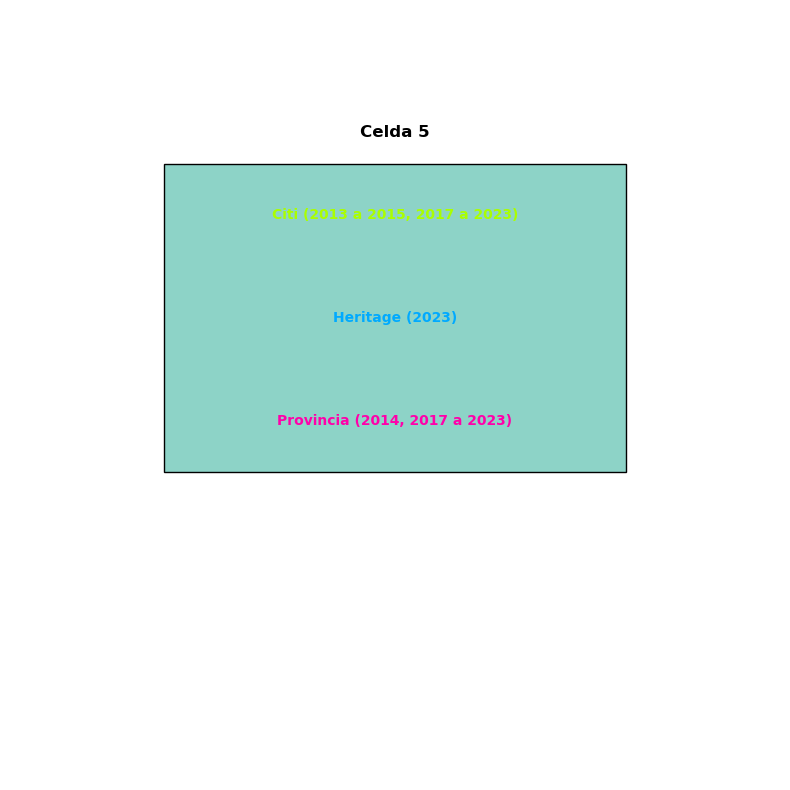

In [46]:
# Cargar los datos
modelo = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\aweSOM_06_805408.csv')
short_name_colors = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\short_name_colors.csv').set_index('Short_name')

# Definir colores específicos para cada celda SOM
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#8DD3C7',  # Verde
    6: '#fed9a6'   # Anaranjado
}

# Función para agrupar años consecutivos
def format_years(years):
    years = sorted(set(years))
    ranges = []
    start = years[0]

    for i in range(1, len(years)):
        if years[i] != years[i - 1] + 1:
            end = years[i - 1]
            ranges.append(f"{start} a {end}" if start != end else str(start))
            start = years[i]
    ranges.append(f"{start} a {years[-1]}" if start != years[-1] else str(start))

    return ', '.join(ranges)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de visualización ajustado
ax.set_aspect('equal')
plt.axis('off')

# Función para dibujar solo el rectángulo de la celda 1
def draw_rectangle(cell_number, position_x, position_y):
    celda_especifica = modelo[modelo['SOM.cell'] == cell_number]
    grouped = celda_especifica.groupby('Short_name')['año'].apply(lambda x: format_years(x)).reset_index()
    grouped = grouped.sort_values('Short_name')  # Ordenar alfabéticamente
    
    if not grouped.empty:
        correct_color = cell_colors.get(cell_number, 'white')  # Color específico para la celda
        
        # Dibujo del rectángulo
        rect = Rectangle((position_x, position_y), 0.6, 0.4, facecolor=correct_color, edgecolor='k', transform=ax.transAxes)
        ax.add_patch(rect)

        # Título del rectángulo (número de la celda)
        ax.text(position_x + 0.3, position_y + 0.4 + 0.05, f"Celda {cell_number}", ha='center', va='top', color='black', fontsize=12, fontweight='bold', transform=ax.transAxes)

        # Distribución de textos con color específico
        num_entries = len(grouped)
        vertical_space = 0.4 / num_entries
        vertical_start = position_y + 0.4 - (vertical_space / 2)

        for index, row in enumerate(grouped.itertuples()):
            short_name = row.Short_name
            years = row.año
            text_color = short_name_colors.loc[short_name, 'Color'] if short_name in short_name_colors.index else 'black'

            # Posicionar texto
            y_pos = vertical_start - (vertical_space * index)
            ax.text(position_x + 0.3, y_pos, f"{short_name} ({years})", ha='center', va='center', color=text_color, fontsize=10, fontweight='bold', transform=ax.transAxes)

# Dibujar solo la celda 1 como un rectángulo
draw_rectangle(5, 0.2, 0.4)

plt.show()

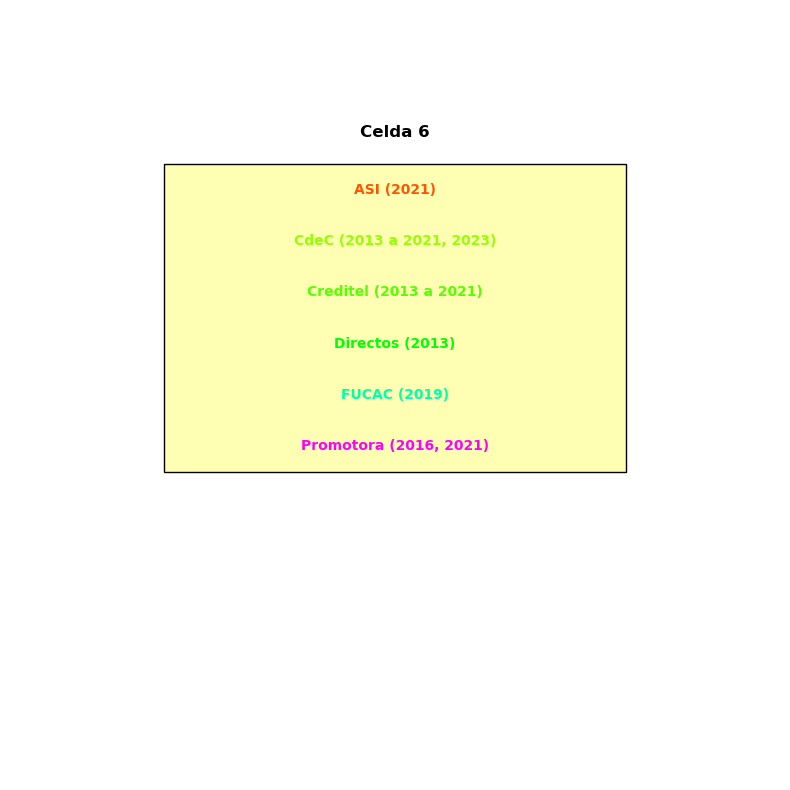

In [47]:
# Cargar los datos
modelo = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\aweSOM_06_805408.csv')
short_name_colors = pd.read_csv(r'C:\Users\Javier\Desktop\PBA 2022\10 Tesis\Tesis_UM_Hermes_Javier_LOPEZ\Data\short_name_colors.csv').set_index('Short_name')

# Definir colores específicos para cada celda SOM
cell_colors = {
    1: '#8DD3C7',   # Rosado
    2: '#FFFFB3',   # Amarillo
    3: '#BEBADA',   # Violeta
    4: '#8DD3C7',   # Verde
    5: '#8DD3C7',   # Celeste
    6: '#FFFFB3'    # Anaranjado
}

# Función para agrupar años consecutivos
def format_years(years):
    years = sorted(set(years))
    ranges = []
    start = years[0]

    for i in range(1, len(years)):
        if years[i] != years[i - 1] + 1:
            end = years[i - 1]
            ranges.append(f"{start} a {end}" if start != end else str(start))
            start = years[i]
    ranges.append(f"{start} a {years[-1]}" if start != years[-1] else str(start))

    return ', '.join(ranges)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de visualización ajustado
ax.set_aspect('equal')
plt.axis('off')

# Función para dibujar solo el rectángulo de la celda 1
def draw_rectangle(cell_number, position_x, position_y):
    celda_especifica = modelo[modelo['SOM.cell'] == cell_number]
    grouped = celda_especifica.groupby('Short_name')['año'].apply(lambda x: format_years(x)).reset_index()
    grouped = grouped.sort_values('Short_name')  # Ordenar alfabéticamente
    
    if not grouped.empty:
        correct_color = cell_colors.get(cell_number, 'white')  # Color específico para la celda
        
        # Dibujo del rectángulo
        rect = Rectangle((position_x, position_y), 0.6, 0.4, facecolor=correct_color, edgecolor='k', transform=ax.transAxes)
        ax.add_patch(rect)

        # Título del rectángulo (número de la celda)
        ax.text(position_x + 0.3, position_y + 0.4 + 0.05, f"Celda {cell_number}", ha='center', va='top', color='black', fontsize=12, fontweight='bold', transform=ax.transAxes)

        # Distribución de textos con color específico
        num_entries = len(grouped)
        vertical_space = 0.4 / num_entries
        vertical_start = position_y + 0.4 - (vertical_space / 2)

        for index, row in enumerate(grouped.itertuples()):
            short_name = row.Short_name
            years = row.año
            text_color = short_name_colors.loc[short_name, 'Color'] if short_name in short_name_colors.index else 'black'

            # Posicionar texto
            y_pos = vertical_start - (vertical_space * index)
            ax.text(position_x + 0.3, y_pos, f"{short_name} ({years})", ha='center', va='center', color=text_color, fontsize=10, fontweight='bold', transform=ax.transAxes)

# Dibujar solo la celda 1 como un rectángulo
draw_rectangle(6, 0.2, 0.4)

plt.show()

## Anova y P-valor

In [59]:
# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Cargar los datos
df = pd.read_csv(input_path)



# Lista de variables para el análisis ANOVA
variables = [
    "ROA", "ROE", "Apalancamiento_Global", "Deterioros_Vencidos", "Cobertura_Morosidad",
    "Tasa_Morosidad", "Credito_Activo", "Deterioro_Credito", "Ratio_Eficiencia",
    "Intereses_C_Vigente", "Comisiones_C_Vigente", "Comisiones_perd_C_Vigente",
    "Incobrables_C_Vigente", "Gastos_C_Vigente", "GPersonal_C_Vigente",
    "Ctos_Ints_C_Vigente", "Resultados_C_Vigente", "Incob_C_Bruta", "Incob_C_Ints",
    "Ingr_C_Bruta"
]

# Almacenar resultados de ANOVA
anova_results = {'Variable': [], 'ANOVA Statistic': [], 'p-value': [], 'Diagnosis': [], 'Mean': [], 'Q0': [], 'Q1': []}

# Realizar ANOVA para cada variable y calcular el promedio, Q0 y Q1 para cada 'SOM.cell'
for variable in variables:
    groups = [group[variable].dropna() for name, group in df_filtered.groupby('SOM.cell') if not group[variable].isnull().all()]
    if len(groups) > 1:  # ANOVA necesita al menos dos grupos con datos
        anova_result = f_oneway(*groups)
        anova_results['Variable'].append(variable)
        anova_results['ANOVA Statistic'].append(round(anova_result.statistic, 2))
        anova_results['p-value'].append(round(anova_result.pvalue, 3))
        # Diagnóstico basado en p-value
        diagnosis = "Diferencia significativa" if anova_result.pvalue < 0.05 else "Sin diferencia significativa"
        anova_results['Diagnosis'].append(diagnosis)
        
        # Cálculos de estadísticos de interés por variable
        overall_mean = df_filtered[variable].mean()
        q0 = df_filtered[variable].quantile(0)  # Min value
        q1 = df_filtered[variable].quantile(0.25)  # 25th percentile
        anova_results['Mean'].append(round(overall_mean, 2))
        anova_results['Q0'].append(round(q0, 2))
        anova_results['Q1'].append(round(q1, 2))
    else:
        anova_results['Variable'].append(variable)
        anova_results['ANOVA Statistic'].append(None)
        anova_results['p-value'].append(None)
        anova_results['Diagnosis'].append("Insuficiente para ANOVA")
        anova_results['Mean'].append(None)
        anova_results['Q0'].append(None)
        anova_results['Q1'].append(None)

# Convertir los resultados a un DataFrame
anova_df = pd.DataFrame(anova_results)

# Ajustar el índice para que comience desde 1
anova_df.index = anova_df.index + 1

# Mostrar el cuadro de datos en consola
print(anova_df)

# (Opcional) Mostrar el cuadro de datos en un entorno interactivo como Jupyter Notebook
try:
    from IPython.display import display
    display(anova_df)
except ImportError:
    pass


                     Variable  ANOVA Statistic  p-value  \
1                         ROA            67.93    0.000   
2                         ROE            47.61    0.000   
3       Apalancamiento_Global           129.01    0.000   
4         Deterioros_Vencidos             4.01    0.002   
5         Cobertura_Morosidad            39.14    0.000   
6              Tasa_Morosidad           159.69    0.000   
7              Credito_Activo           144.85    0.000   
8           Deterioro_Credito           170.97    0.000   
9            Ratio_Eficiencia             3.04    0.011   
10        Intereses_C_Vigente           122.12    0.000   
11       Comisiones_C_Vigente           157.37    0.000   
12  Comisiones_perd_C_Vigente           192.59    0.000   
13      Incobrables_C_Vigente            70.30    0.000   
14           Gastos_C_Vigente            80.25    0.000   
15        GPersonal_C_Vigente            67.60    0.000   
16        Ctos_Ints_C_Vigente            21.26    0.000 

,Variable,ANOVA Statistic,p-value,Diagnosis,Mean,Q0,Q1
1,ROA,67.93,0.000,Diferencia significativa,0.04,-0.25,0.00
2,ROE,47.61,0.000,Diferencia significativa,0.15,-0.85,0.02
3,Apalancamiento_Global,129.01,0.000,Diferencia significativa,5.55,0.03,1.18
4,Deterioros_Vencidos,4.01,0.002,Diferencia significativa,4.21,0.00,0.96
5,Cobertura_Morosidad,39.14,0.000,Diferencia significativa,40.30,0.52,13.49
6,Tasa_Morosidad,159.69,0.000,Diferencia significativa,0.11,0.00,0.01
7,Credito_Activo,144.85,0.000,Diferencia significativa,0.63,-0.00,0.50
8,Deterioro_Credito,170.97,0.000,Diferencia significativa,0.12,0.00,0.03
9,Ratio_Eficiencia,3.04,0.011,Diferencia significativa,0.86,-3.07,0.56
10,Intereses_C_Vigente,122.12,0.000,Diferencia significativa,0.25,0.01,0.11


## Box plot 

ROA

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



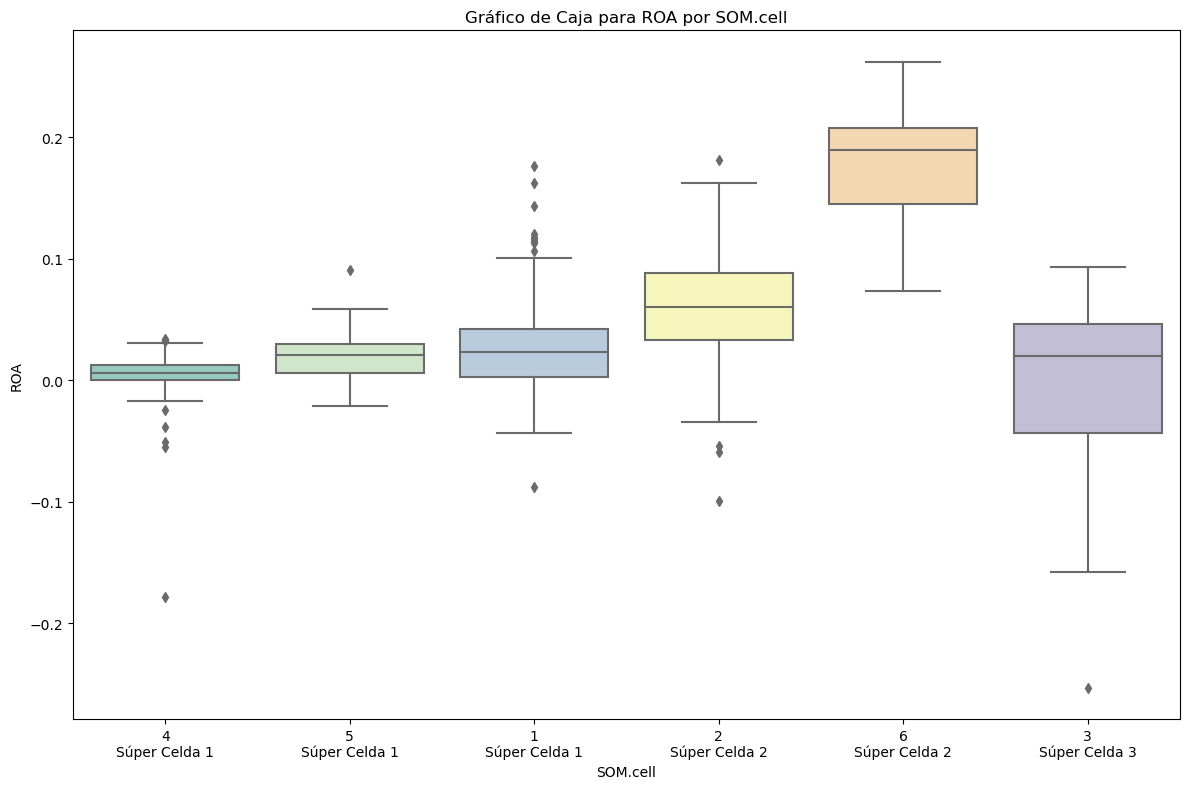

In [64]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'ROA'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


ROE

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



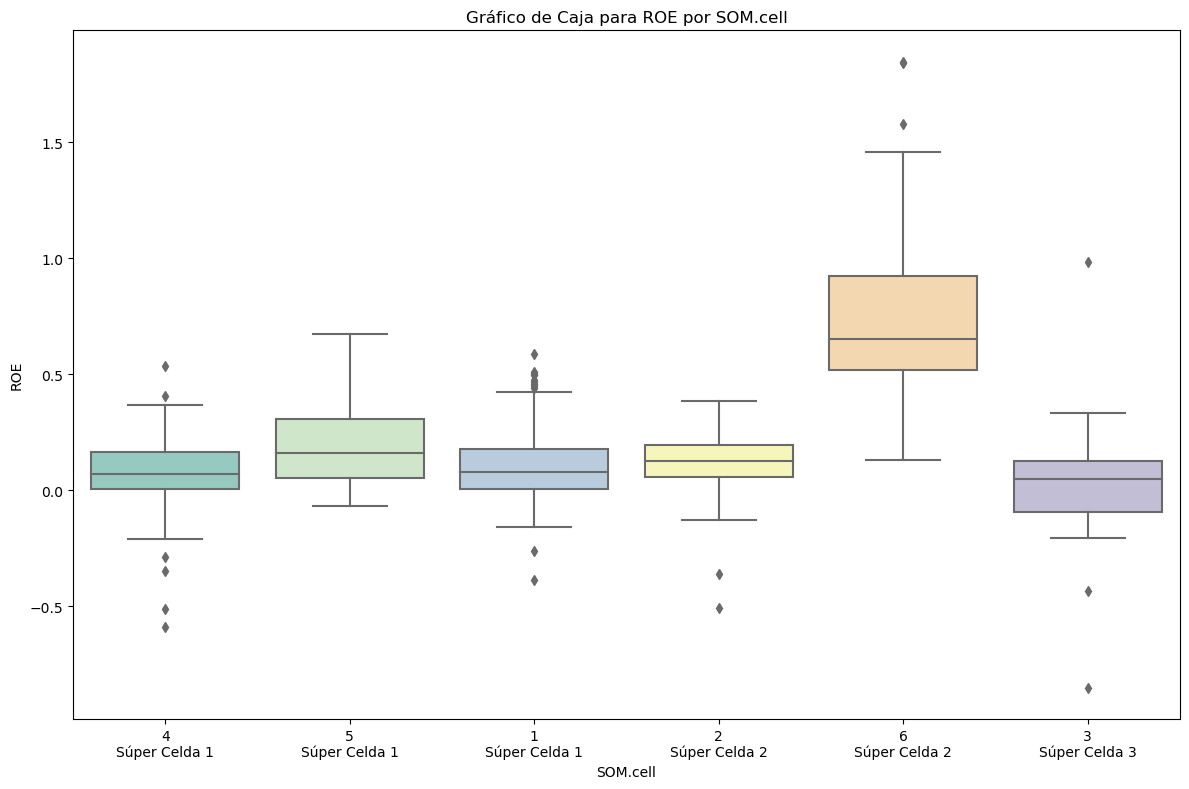

In [67]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'ROE'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Apalancamiento_Global

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



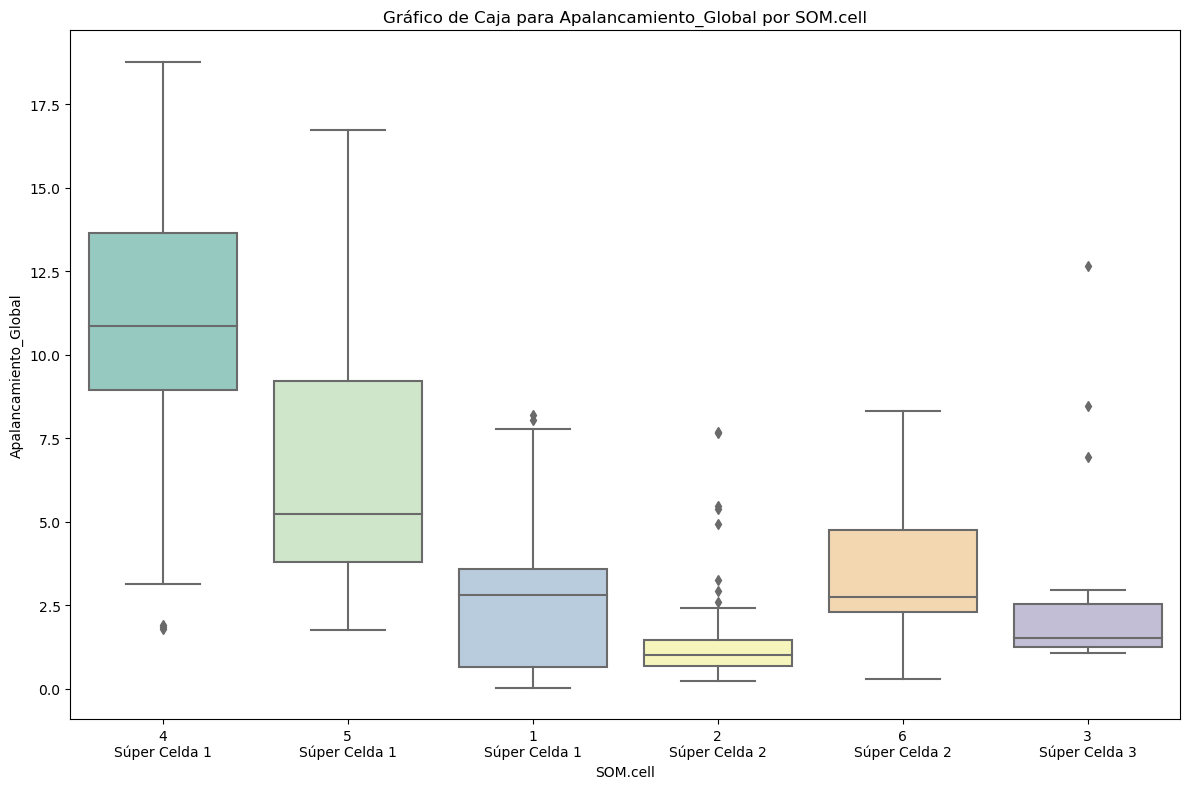

In [69]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Apalancamiento_Global'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Deterioros_Vencidos

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



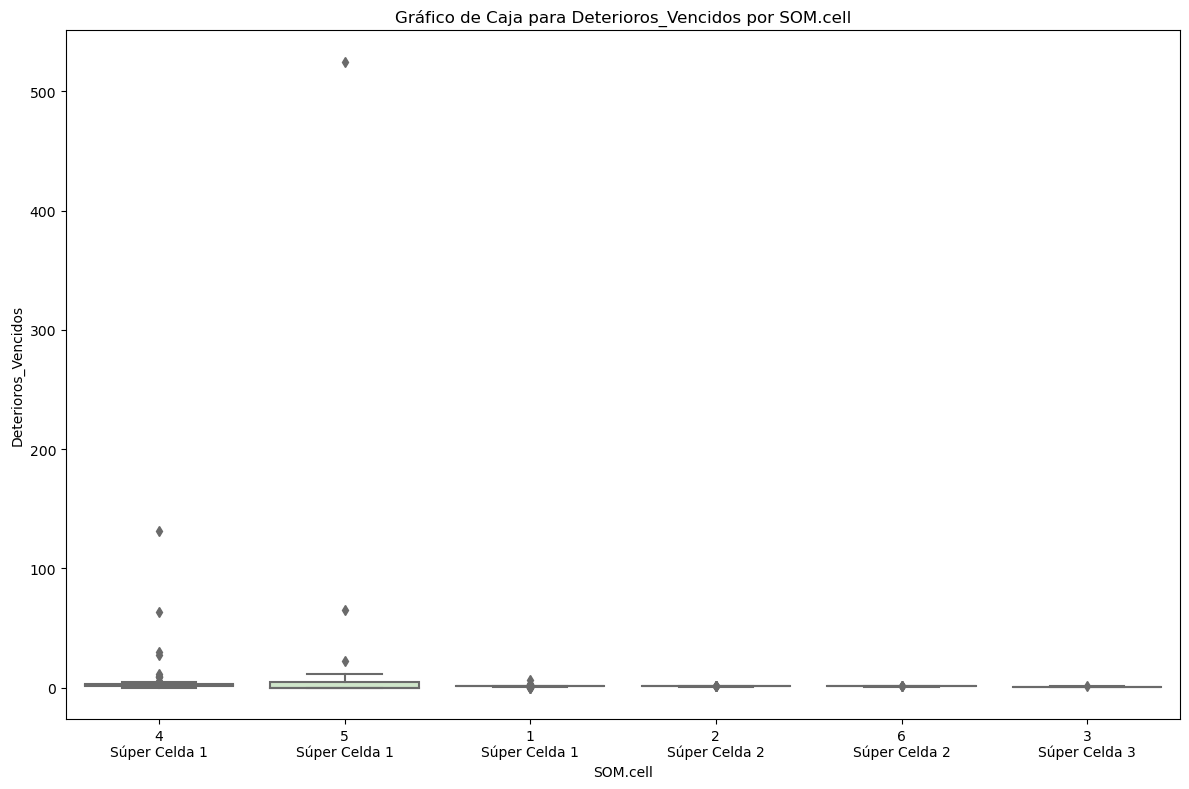

In [71]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'Deterioros_Vencidos'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



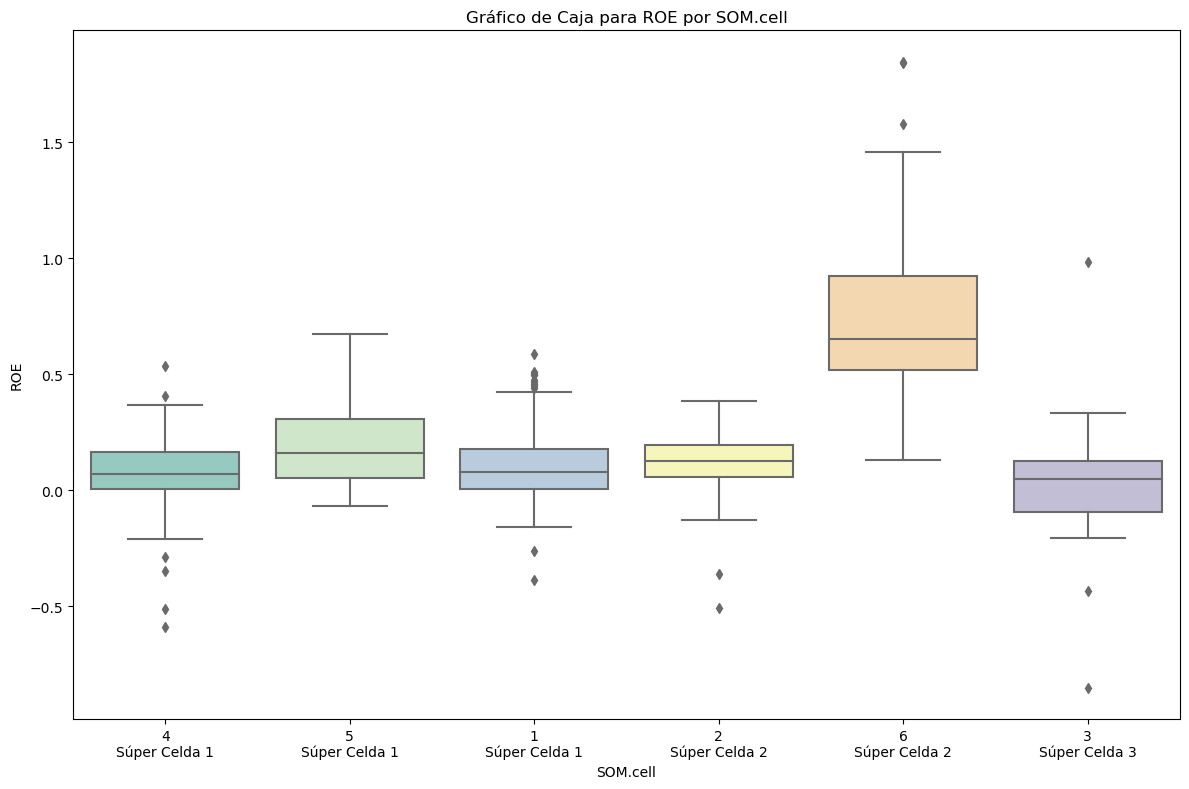

In [72]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'ROE'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



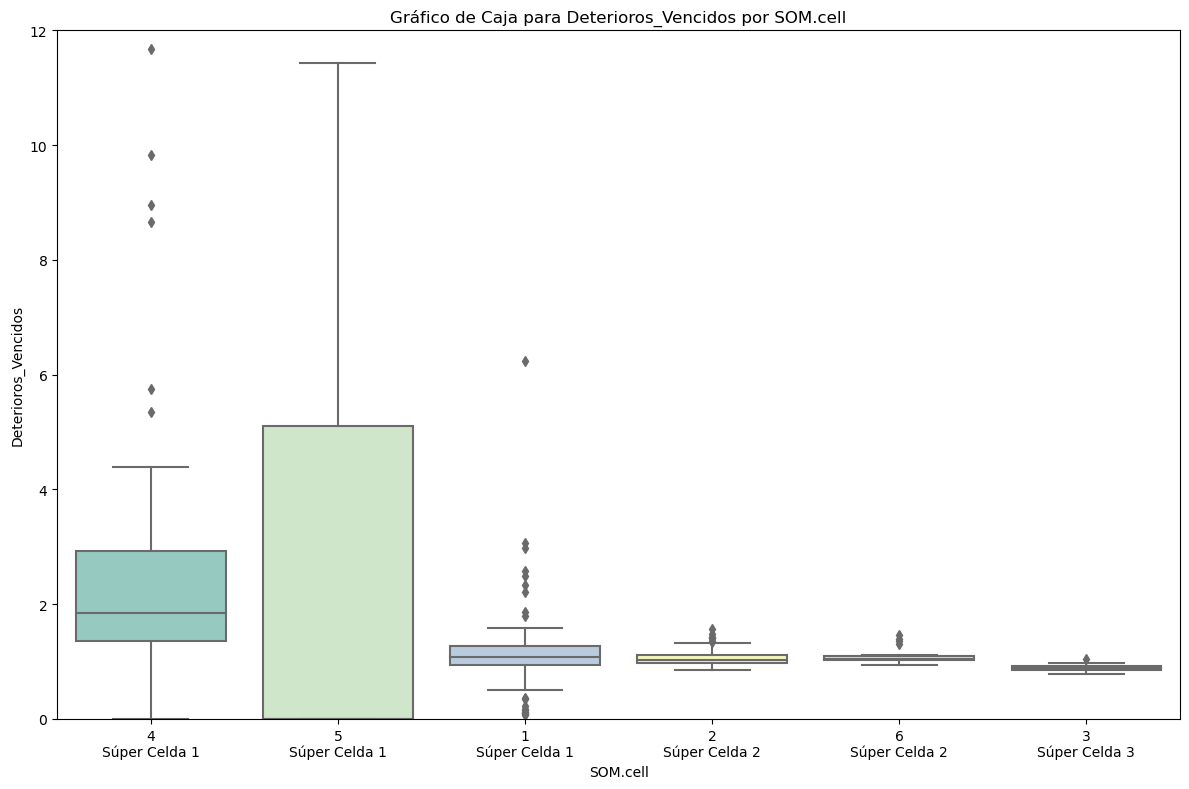

In [73]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'Deterioros_Vencidos'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Establecer el límite máximo en el eje Y
plt.ylim(0, 12)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Cobertura_Morosidad

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



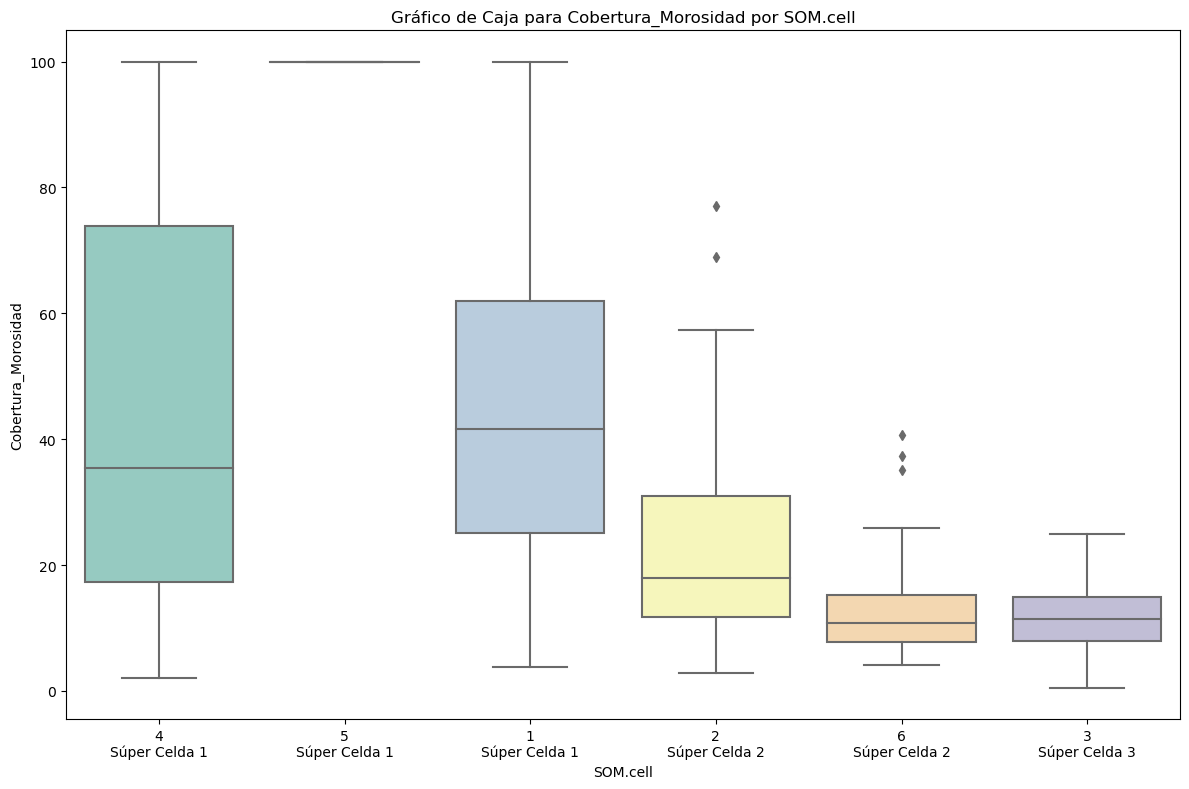

In [75]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Cobertura_Morosidad'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Tasa_Morosidad

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



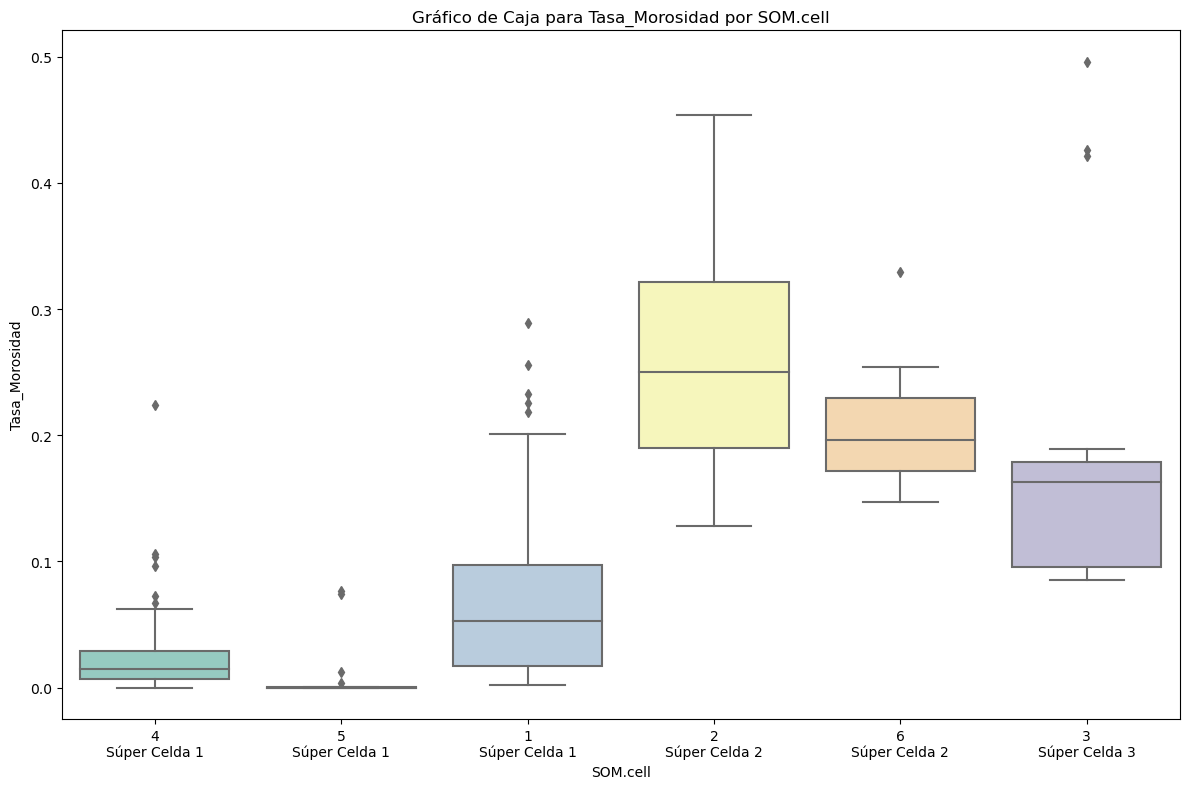

In [77]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Tasa_Morosidad'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Credito_Activo

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



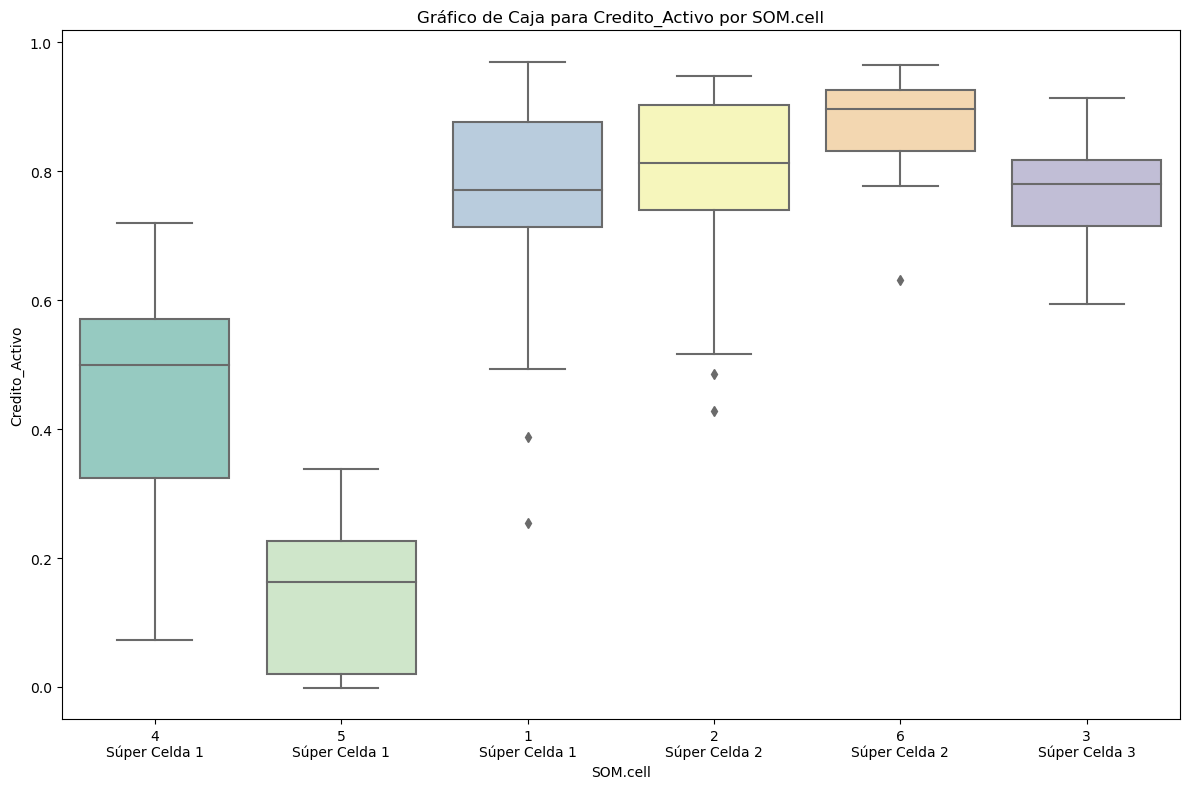

In [79]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Credito_Activo'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Deterioro_Credito

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



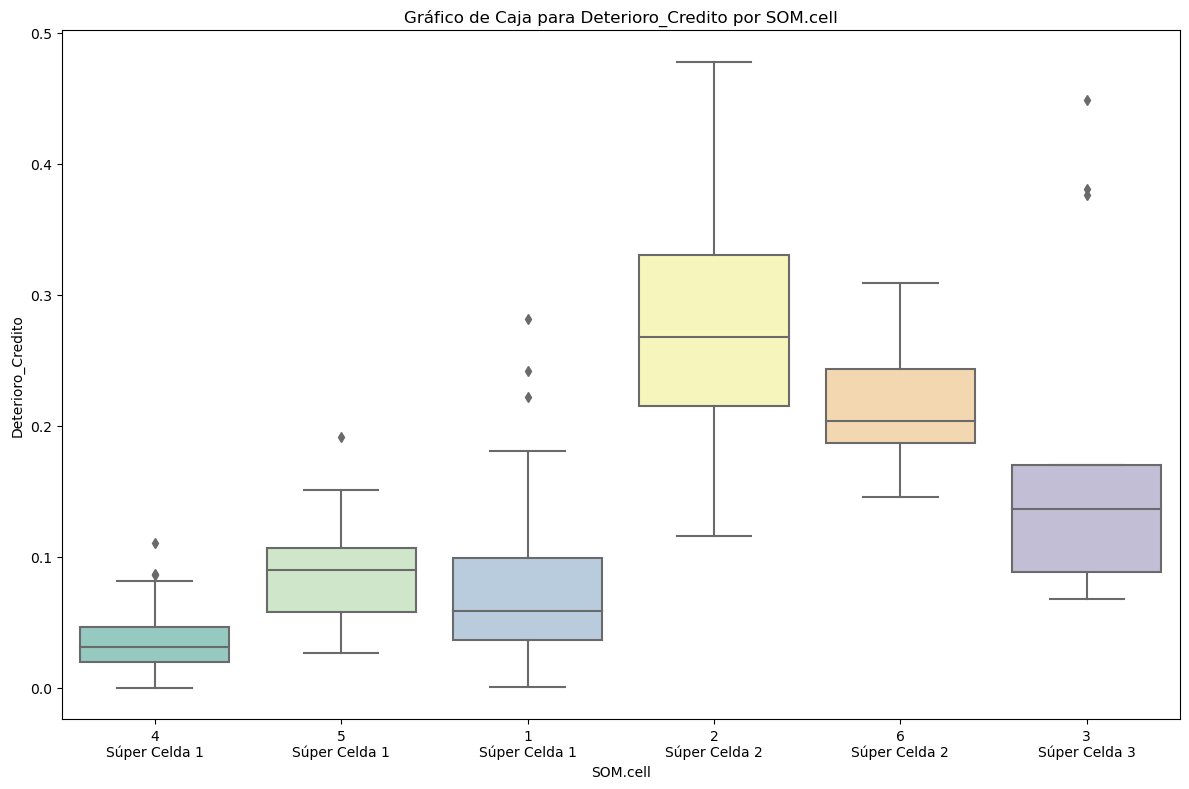

In [81]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Deterioro_Credito'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Ratio_Eficiencia

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



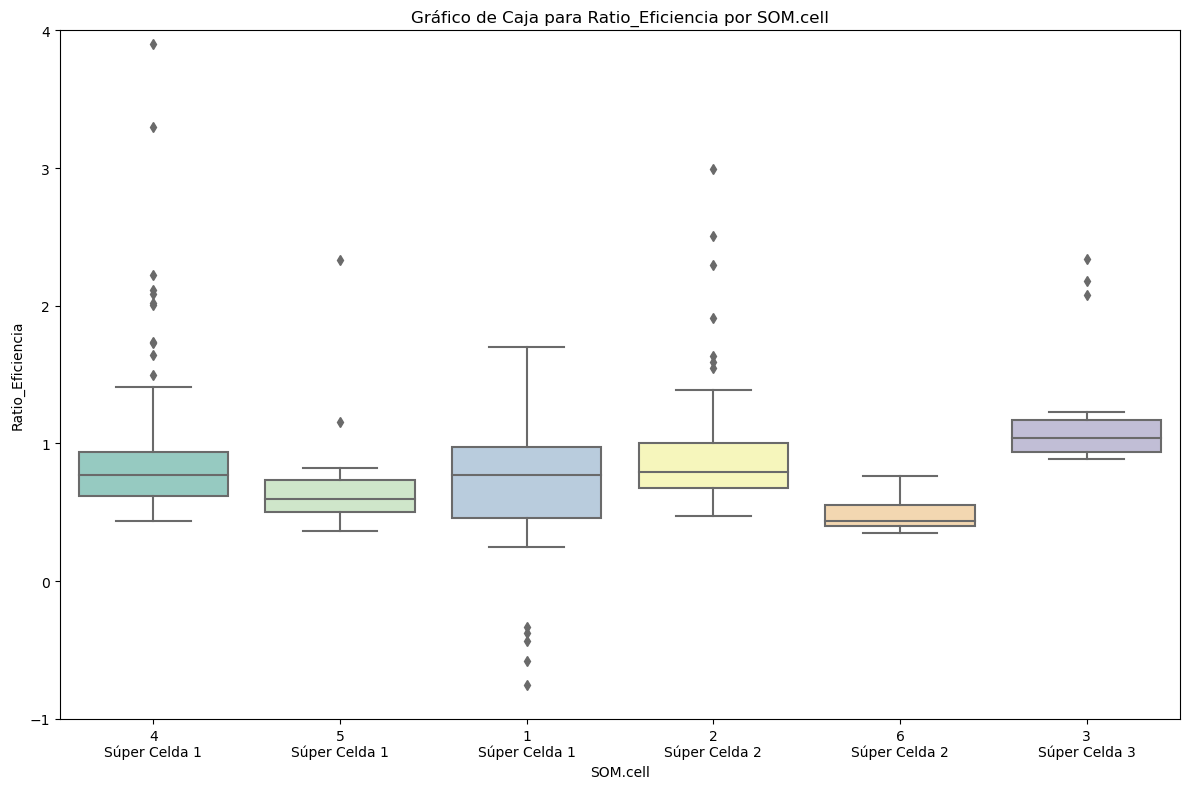

In [83]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'Ratio_Eficiencia'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Establecer el límite máximo en el eje Y
plt.ylim(-1, 4)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Intereses_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



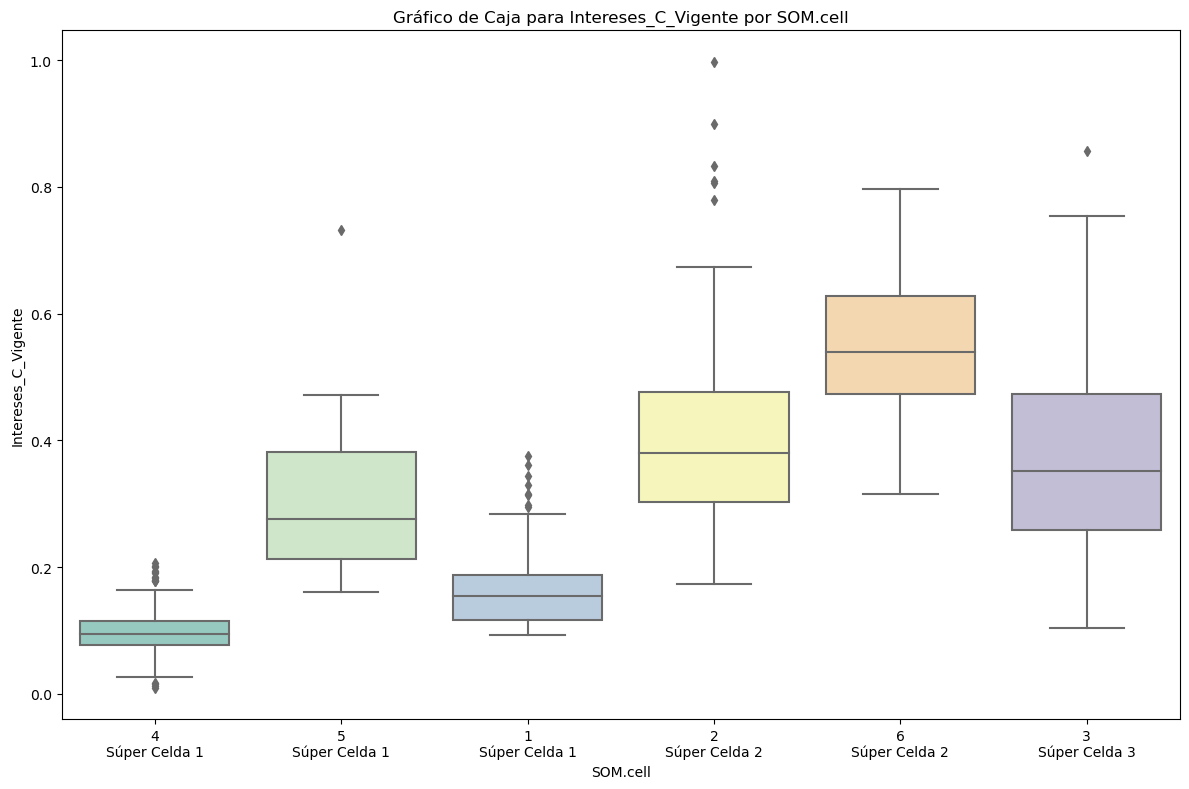

In [85]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Intereses_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Comisiones_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



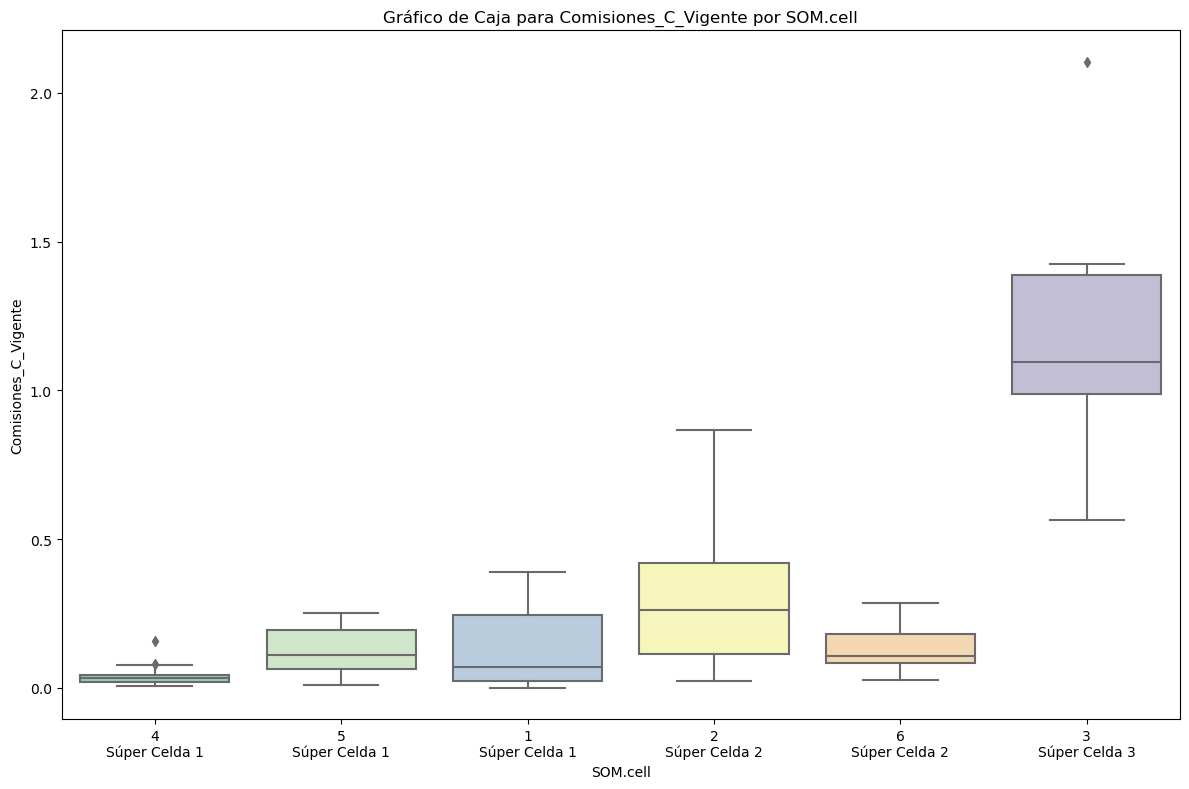

In [87]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Comisiones_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Comisiones_perd_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



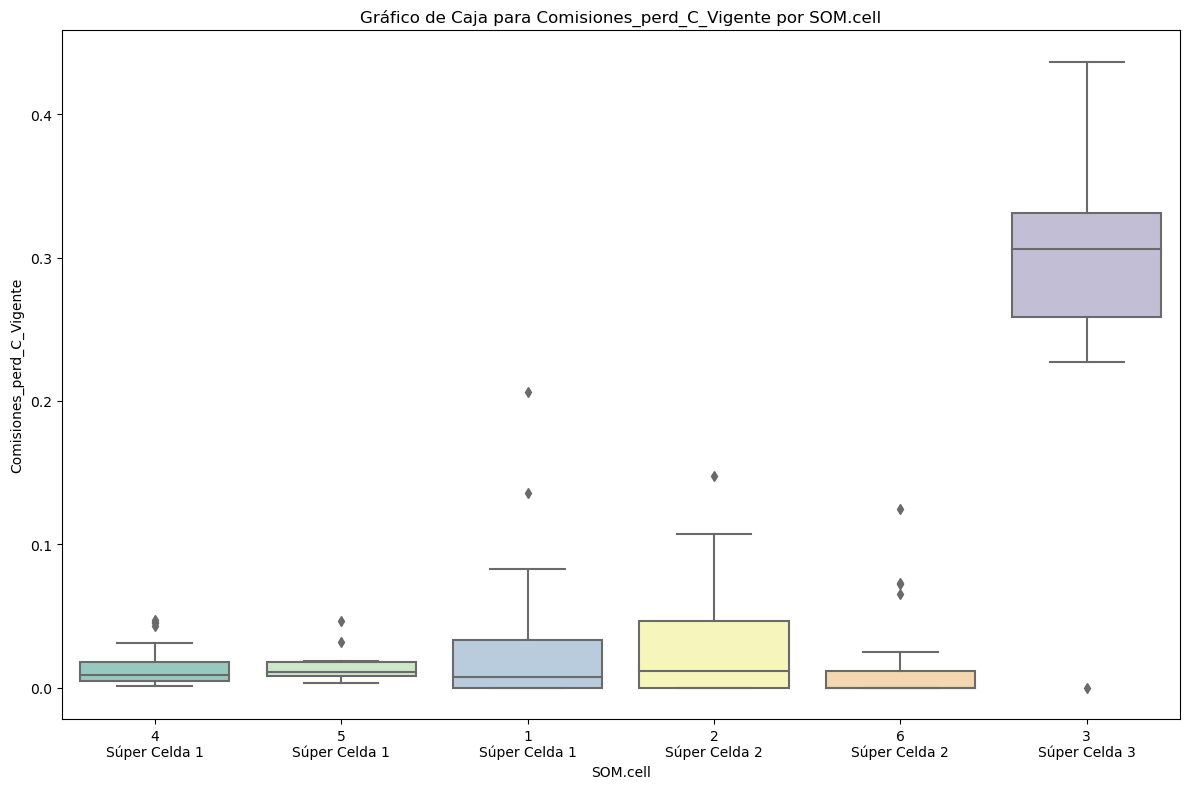

In [89]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'Comisiones_perd_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Incobrables_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



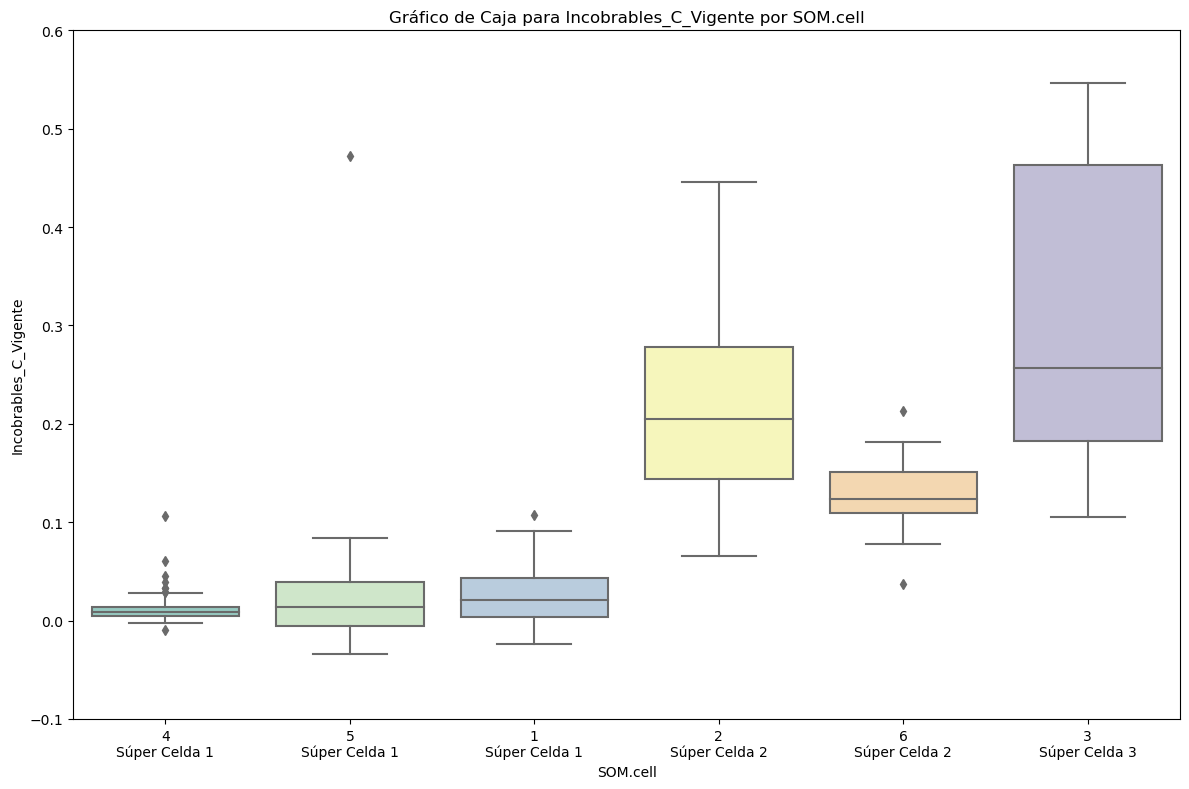

In [91]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'Incobrables_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Establecer el límite máximo en el eje Y
plt.ylim(-0.1, 0.6)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Gastos_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



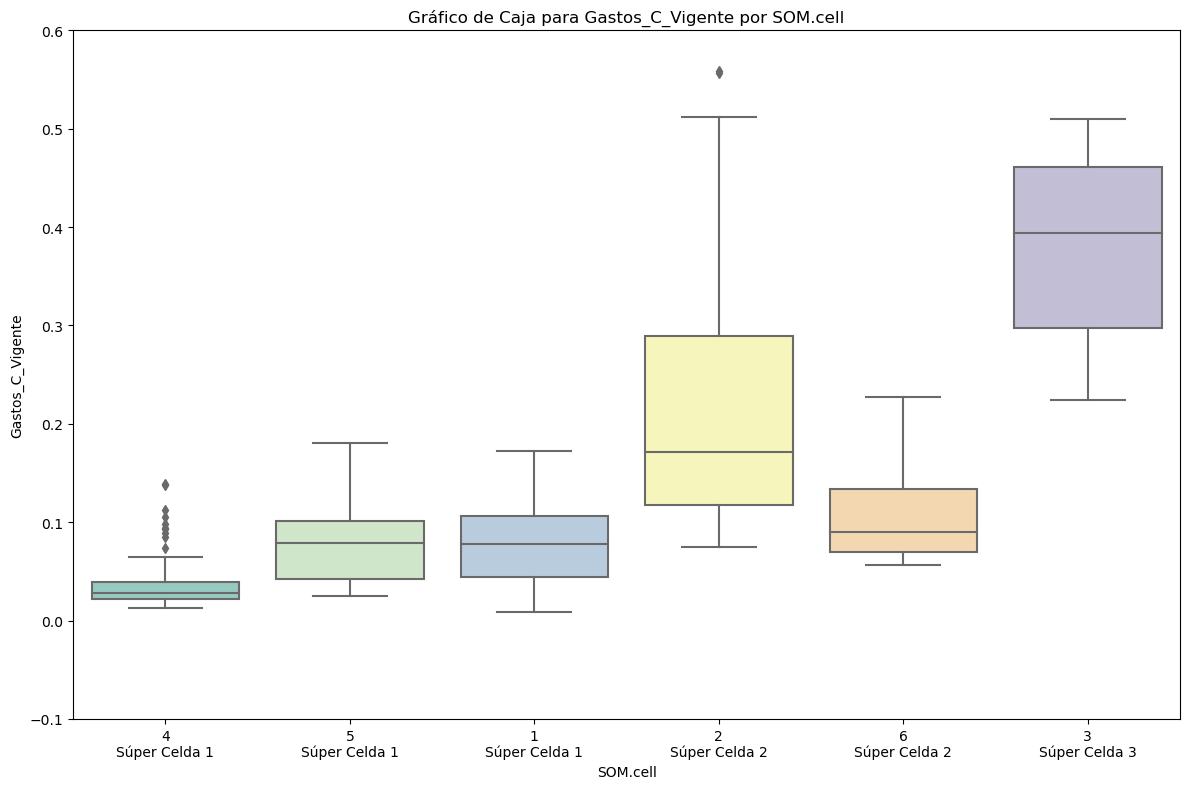

In [93]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Gastos_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Establecer el límite máximo en el eje Y
plt.ylim(-0.1, 0.6)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

GPersonal_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



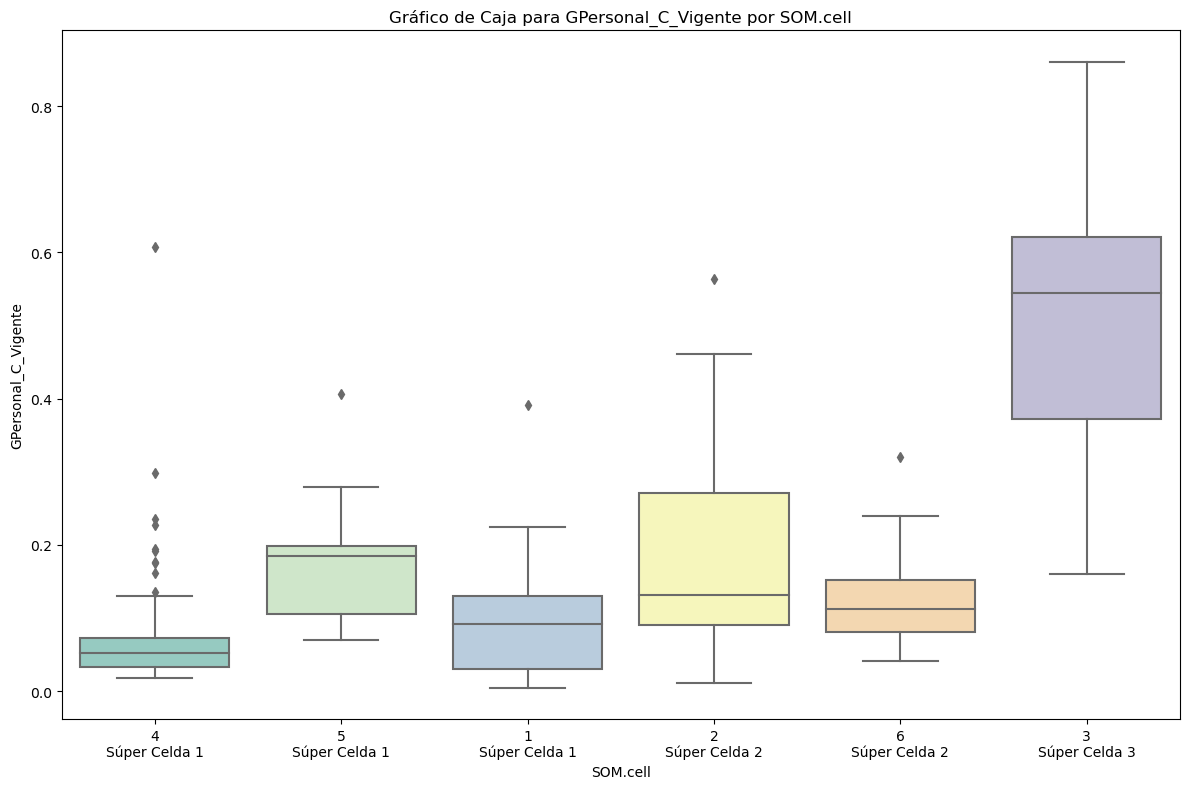

In [95]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'GPersonal_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Ctos_Ints_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



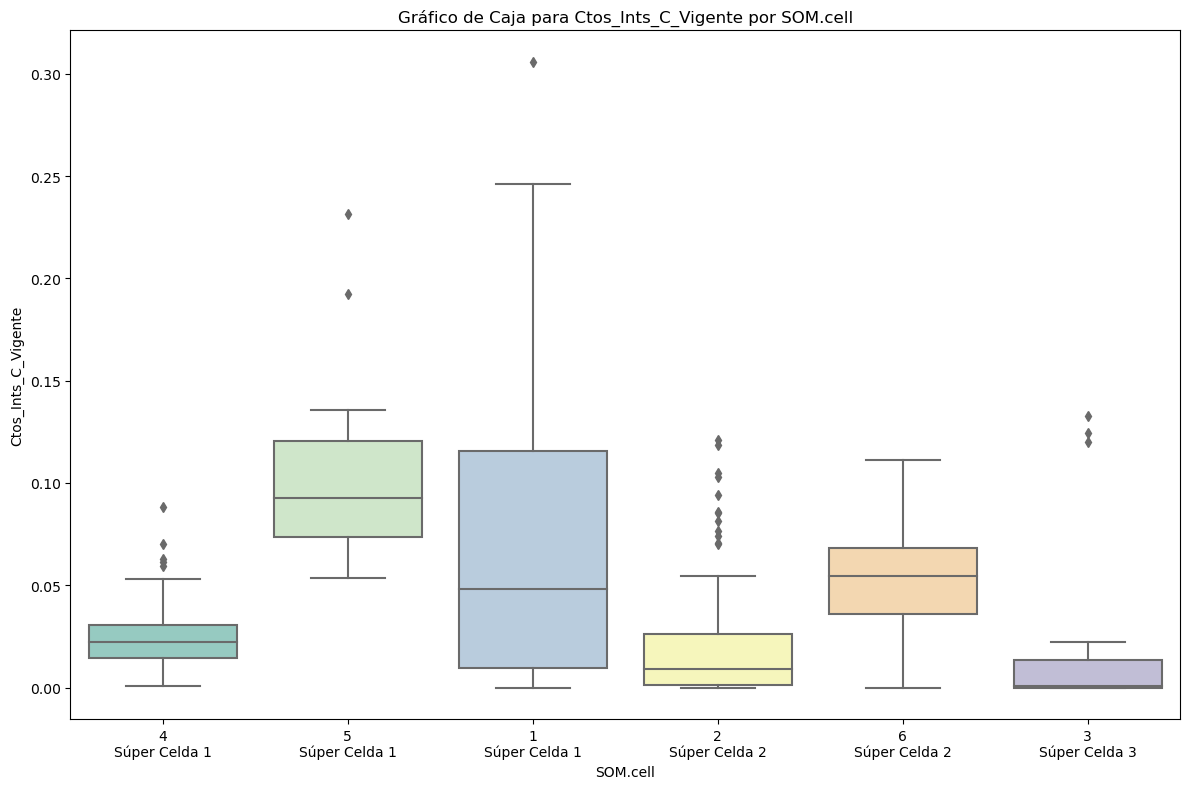

In [97]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Ctos_Ints_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Resultados_C_Vigente

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



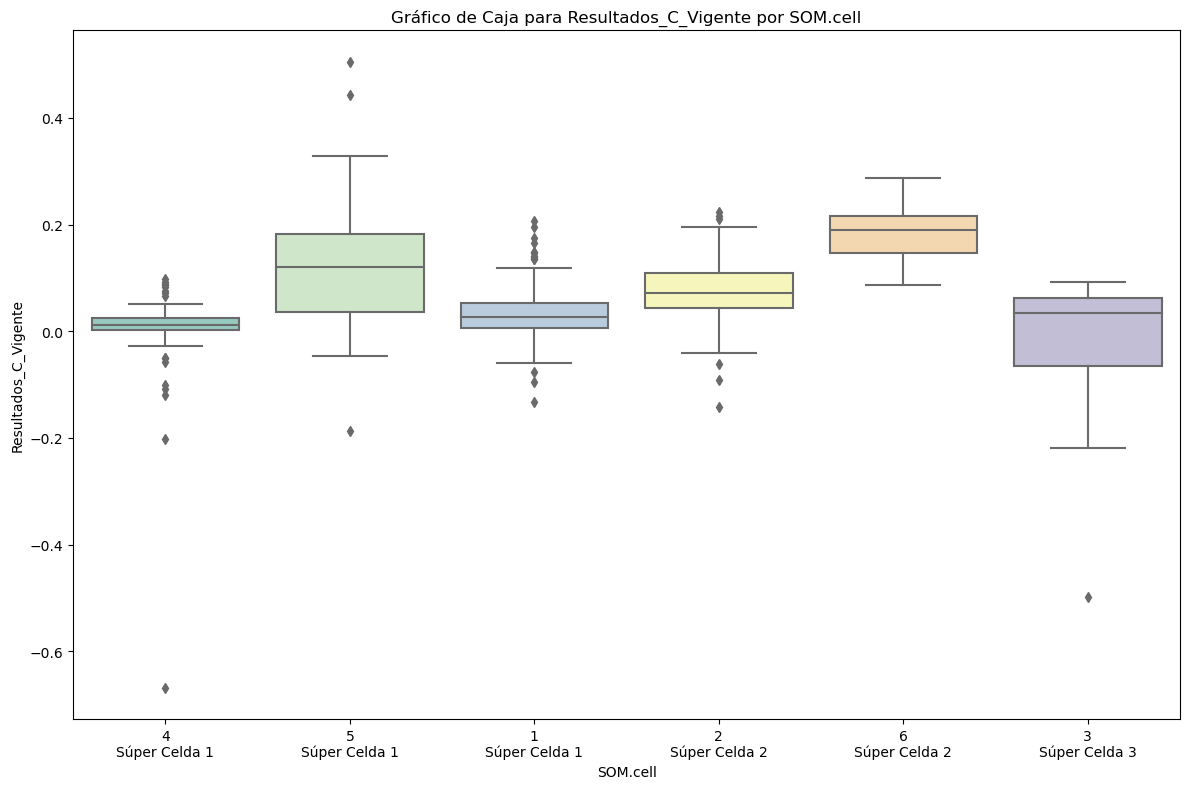

In [99]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Resultados_C_Vigente'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Incob_C_Bruta

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



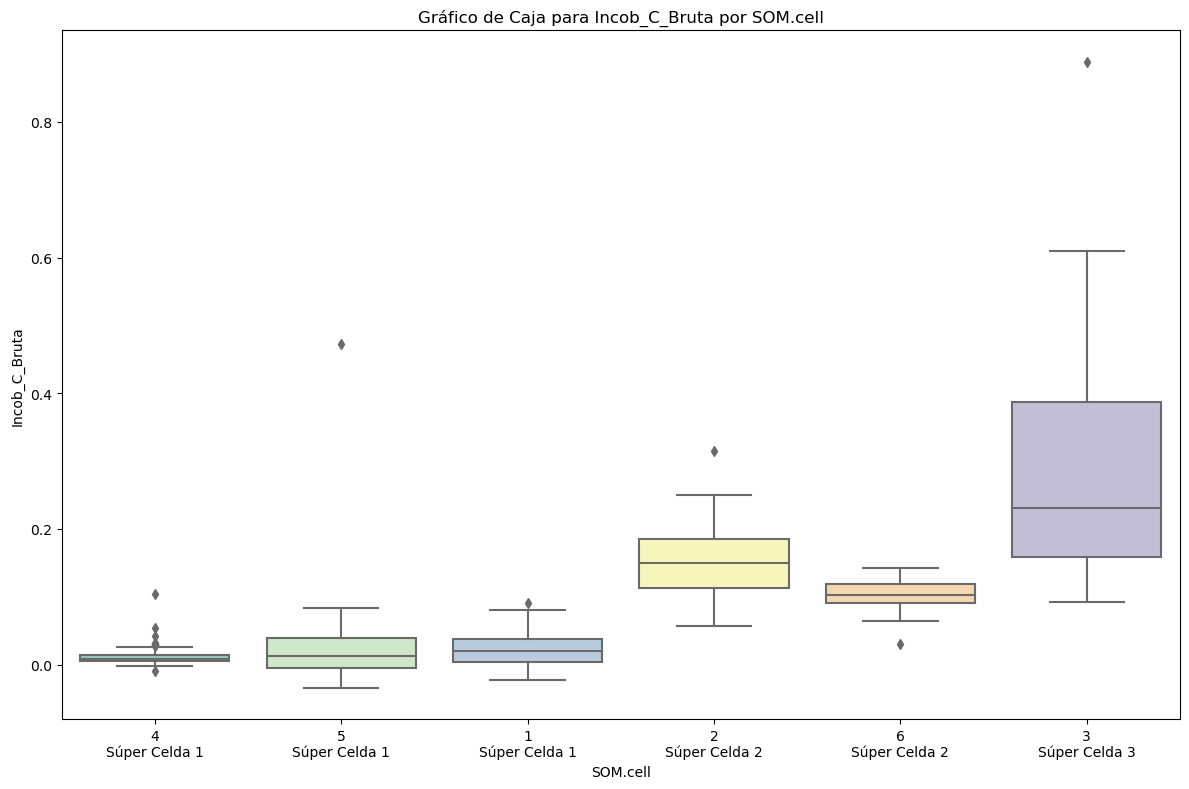

In [102]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Incob_C_Bruta'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Incob_C_Ints

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



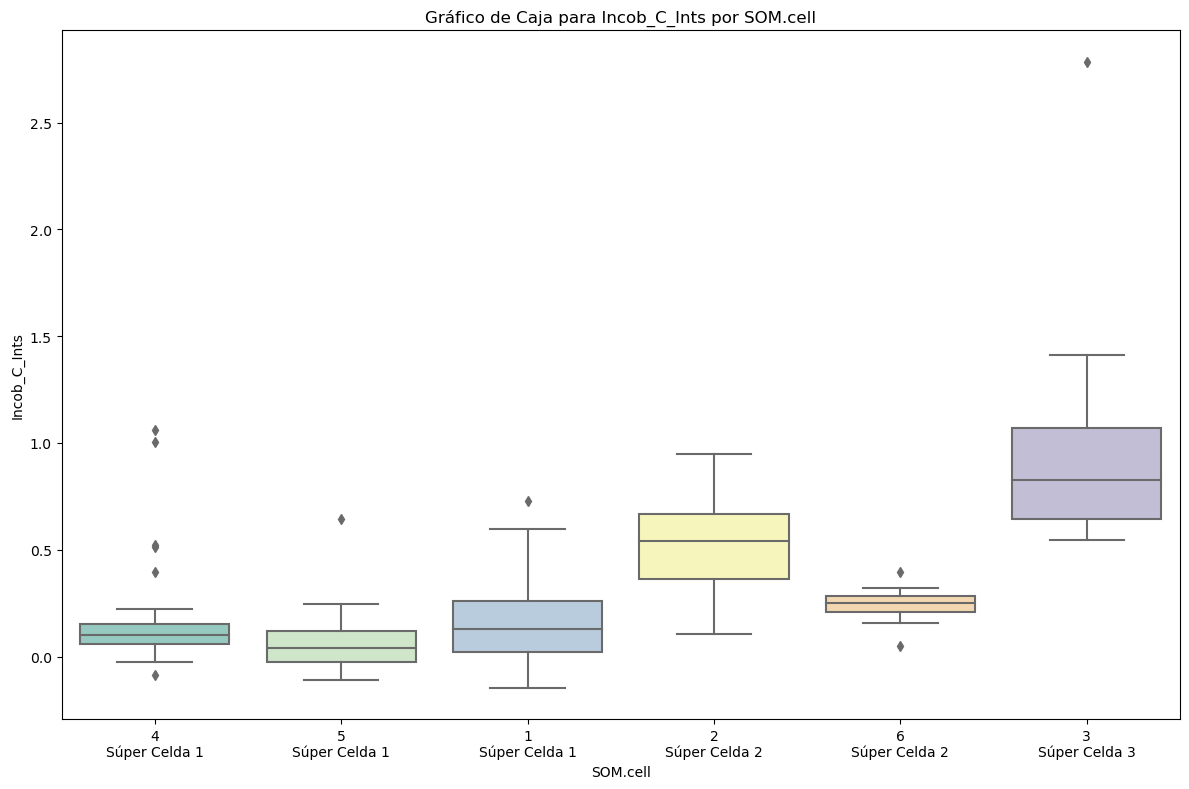

In [104]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")

# Definir la variable que se va a analizar
variable_a_graficar = 'Incob_C_Ints'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Ingr_C_Bruta

C:\Users\Javier\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



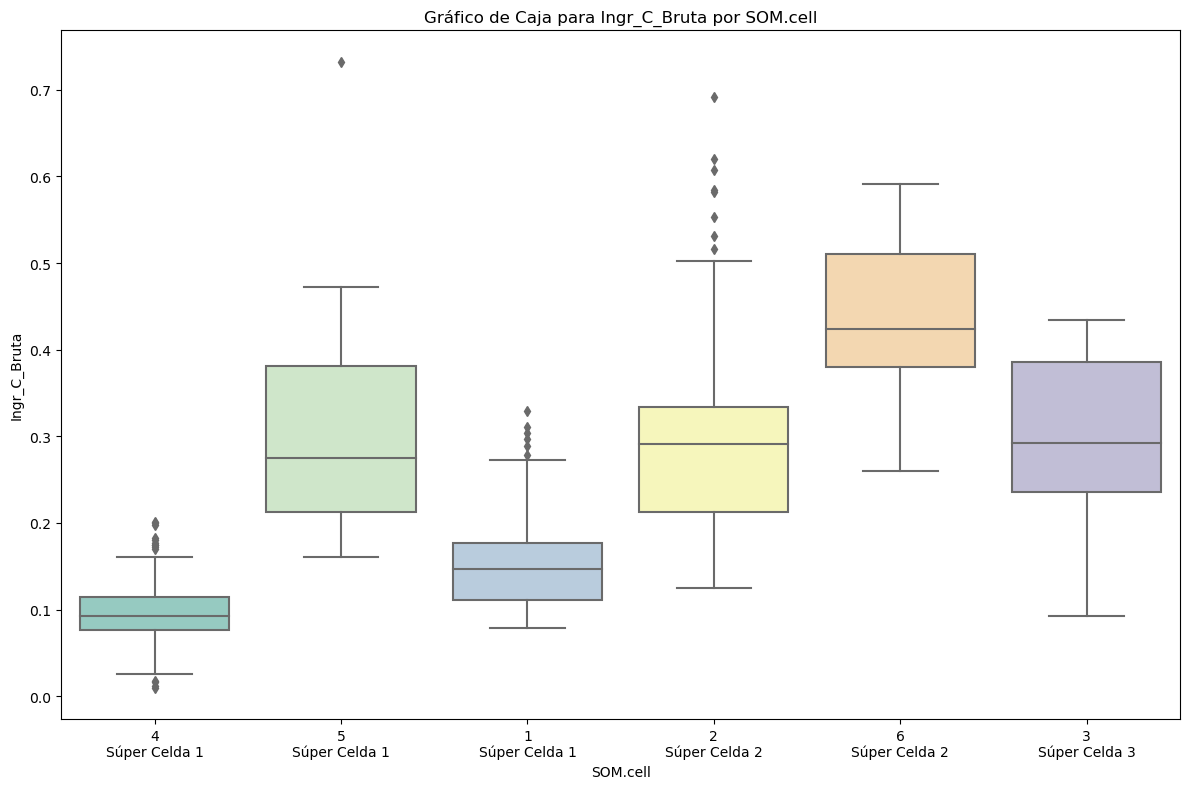

In [106]:

# Cargar los datos
df = pd.read_csv("C:\\Users\\Javier\\Desktop\\PBA 2022\\10 Tesis\\Tesis_UM_Hermes_Javier_LOPEZ\\Data\\aweSOM_06_805408.csv")
# Definir la variable que se va a analizar
variable_a_graficar = 'Ingr_C_Bruta'

# Cargar el archivo
df = pd.read_csv(input_path)

# Seleccionar las columnas relevantes
df = df[['Short_name', variable_a_graficar, 'SOM.cell']]

# Definir colores fijos para cada valor de SOM.cell en formato hexadecimal
cell_colors = {
    1: '#b3cde3',  # Celeste
    2: '#FFFFB3',  # Amarillo
    3: '#BEBADA',  # Violeta
    4: '#8DD3C7',  # Verde
    5: '#ccebc5',  # Rosado
    6: '#fed9a6'   # Anaranjado
}

# Crear una lista de colores en el mismo orden de las celdas del SOM especificado
order = [4, 5, 1, 2, 6, 3]
palette = [cell_colors[cell] for cell in order]

# Convertir la columna 'SOM.cell' a una categoría con el orden especificado
df['SOM.cell'] = pd.Categorical(df['SOM.cell'], categories=order, ordered=True)

# Crear una figura de tamaño ajustado
plt.figure(figsize=(12, 8))

# Usar seaborn para crear el gráfico de caja para la variable definida, agrupada por SOM.cell con el orden especificado
sns.boxplot(x='SOM.cell', y=variable_a_graficar, data=df, palette=palette)

# Ajustar el título y las etiquetas
plt.title(f'Gráfico de Caja para {variable_a_graficar} por SOM.cell')
plt.xlabel('SOM.cell')
plt.ylabel(variable_a_graficar)

# Personalizar etiquetas en el eje X para incluir las "Súper Celdas"
new_labels = ['4\nSúper Celda 1', '5\nSúper Celda 1', '1\nSúper Celda 1', '2\nSúper Celda 2', '6\nSúper Celda 2', '3\nSúper Celda 3']
plt.xticks(ticks=range(len(order)), labels=new_labels)

# Ajustar el espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()